This notebook contains completed versions of Tutorials 1-3 of Psych 205. I put them into a Jupyter notebook under the theory that this would make them easier to reference - I'm not sure if this is actually the case. 

#### Install required packages

In [251]:
install.packages("car", repos='http://cran.us.r-project.org')
install.packages("Hmisc", repos='http://cran.us.r-project.org')
install.packages("effects", repos='http://cran.us.r-project.org')

require(car) #tutorial 1/2
require(Hmisc) #because I like it
#for tutorial 3
require(effects) 
require(splines)

Warning message:
"package 'car' is in use and will not be installed"Warning message:
"package 'Hmisc' is in use and will not be installed"Warning message:
"package 'effects' is in use and will not be installed"

In [252]:
#Fix one line
Davis$height[12] = 166
Davis$weight[12] = 57

### Looking at data

In [253]:
# View(Davis) #Open Davis in interactive viewer (doesn't work in Jupyter notebook)
head(Davis) #view first 10 rows
tail(Davis) #view last 10 rows
describe(Davis) #good summary of all variables and missings, from Hmisc
str(Davis) #see structure of df
names(Davis) #get column names
summary(Davis) #overall summary
summary(Davis$weight) #summary for one variable
table(Davis$sex) #make frequency table of a variable
prop.table(table(Davis$sex)) #Make proportion table of a variable

sex,weight,height,repwt,repht
M,77,182,77,180
F,58,161,51,159
F,53,161,54,158
M,68,177,70,175
F,59,157,59,155
M,76,170,76,165


,sex,weight,height,repwt,repht
195,F,62,164,61,161
196,M,74,175,71,175
197,M,83,180,80,180
198,M,81,175,NA,NA
199,M,90,181,91,178
200,M,79,177,81,178


Davis 

 5  Variables      200  Observations
--------------------------------------------------------------------------------
sex 
       n  missing distinct 
     200        0        2 
                    
Value         F    M
Frequency   112   88
Proportion 0.56 0.44
--------------------------------------------------------------------------------
weight 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     200        0       53    0.999    65.25    14.66    48.95    51.00 
     .25      .50      .75      .90      .95 
   55.00    63.00    73.25    83.10    89.05 

lowest :  39  43  44  45  47, highest:  97 101 102 103 119
--------------------------------------------------------------------------------
height 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     200        0       42    0.999    170.6    10.15    157.0    160.0 
     .25      .50      .75      .90      .95 
   164.0    169.5    177.2    183.0    185.0 

lowest : 148 1

'data.frame':	200 obs. of  5 variables:
 $ sex   : Factor w/ 2 levels "F","M": 2 1 1 2 1 2 2 2 2 2 ...
 $ weight: num  77 58 53 68 59 76 76 69 71 65 ...
 $ height: num  182 161 161 177 157 170 167 186 178 171 ...
 $ repwt : int  77 51 54 70 59 76 77 73 71 64 ...
 $ repht : int  180 159 158 175 155 165 165 180 175 170 ...


[1] "sex"    "weight" "height" "repwt"  "repht"

 sex         weight           height          repwt            repht      
 F:112   Min.   : 39.00   Min.   :148.0   Min.   : 41.00   Min.   :148.0  
 M: 88   1st Qu.: 55.00   1st Qu.:164.0   1st Qu.: 55.00   1st Qu.:160.5  
         Median : 63.00   Median :169.5   Median : 63.00   Median :168.0  
         Mean   : 65.25   Mean   :170.6   Mean   : 65.62   Mean   :168.5  
         3rd Qu.: 73.25   3rd Qu.:177.2   3rd Qu.: 73.50   3rd Qu.:175.0  
         Max.   :119.00   Max.   :197.0   Max.   :124.00   Max.   :200.0  
                                          NA's   :17       NA's   :17     

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   55.00   63.00   65.25   73.25  119.00 


  F   M 
112  88 


   F    M 
0.56 0.44 

### Data cleaning and manipulation

In [254]:
males = Davis[Davis$sex=="M",] # Subset to all rows where column has a given value

vars = c("sex", "weight", "height")
small1 = Davis[vars] #Subset to only those columns

dropvars = names(Davis) %in% c("sex", "weight", "height")
small2 = Davis[!dropvars] #Subset to all BUT those columns

### Plotting

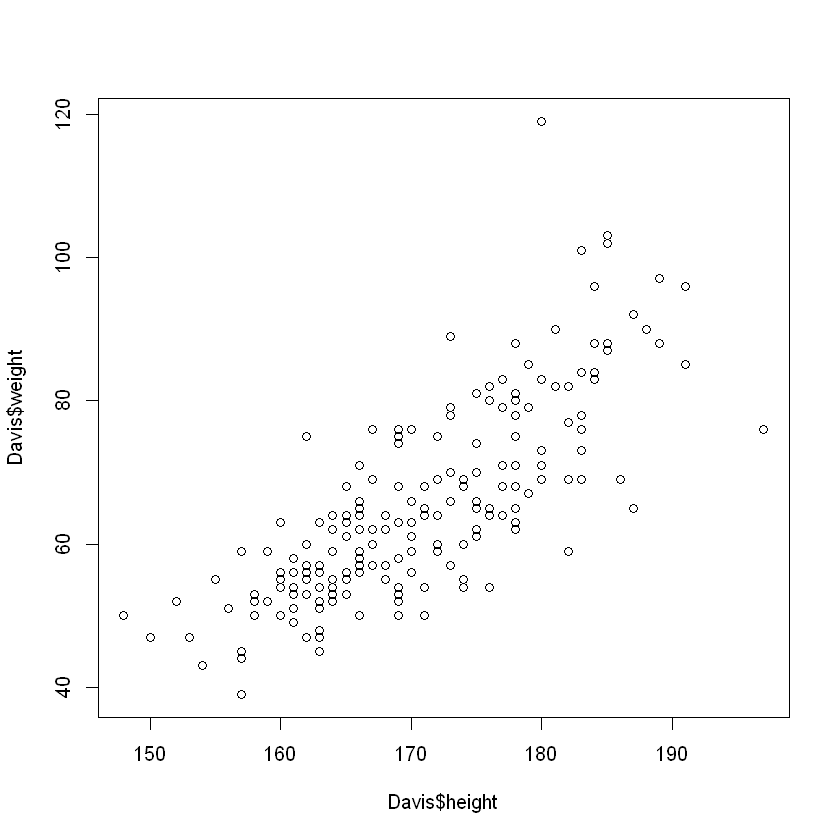

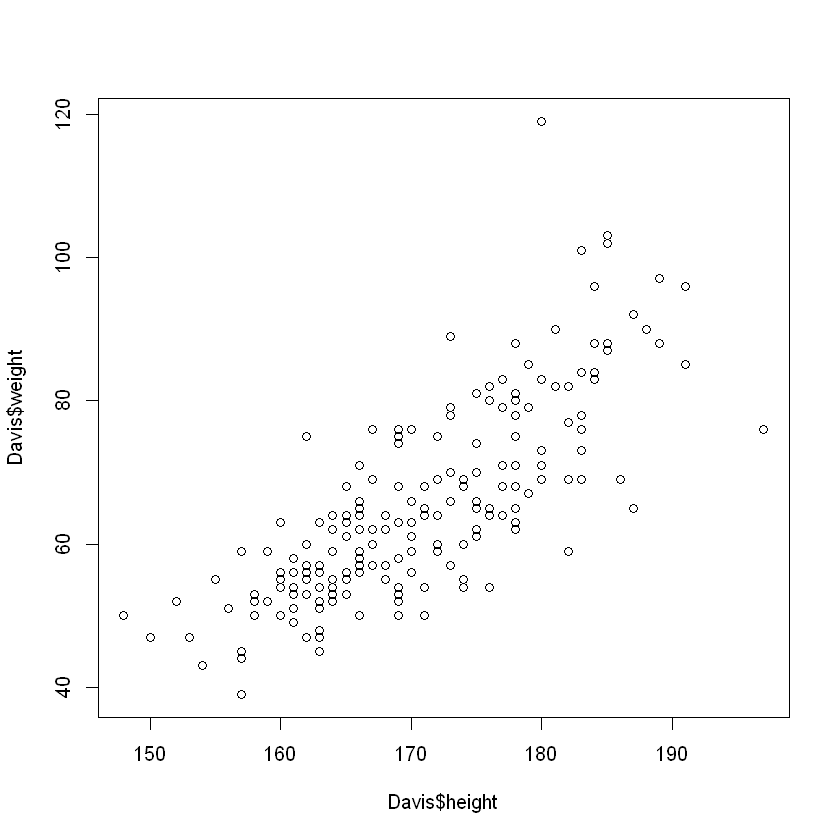

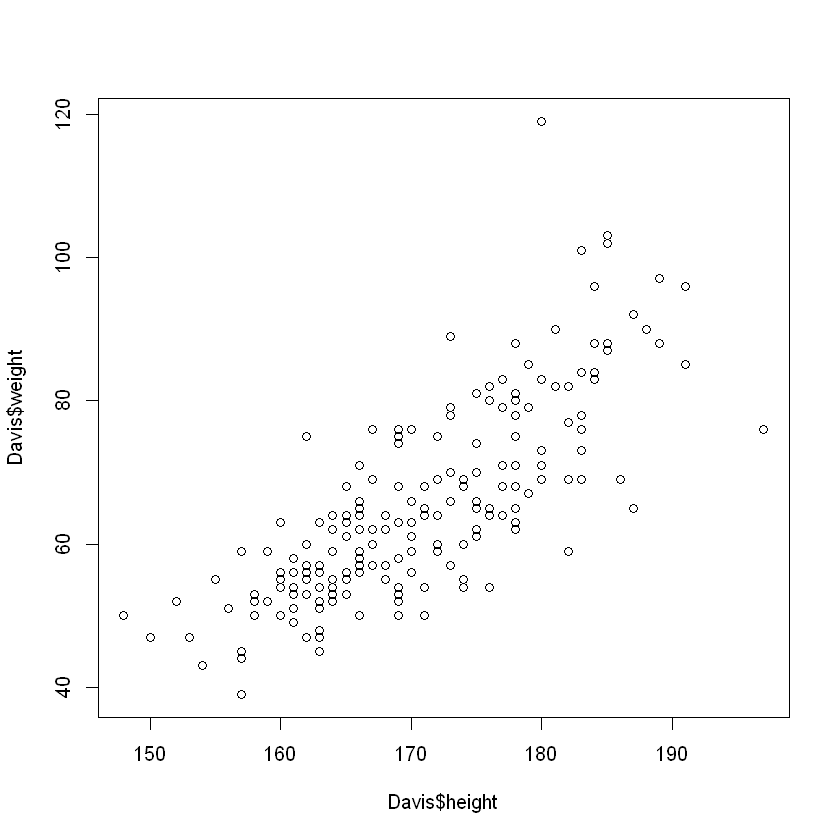

In [255]:
plot(Davis$height, Davis$weight) #these all give the same scatterplot with weight on the y axis and height on the x axis
plot(Davis$weight ~ Davis$height)
plot(x=Davis$height, y=Davis$weight)

# Tutorial 1

### Exercise 1: Sample means from normal distribution, graph
#### Sample from the normal distribution, get the mean

In [256]:
xSamp <- rnorm(100,mean=100, sd=10)
meanSamp <- mean(xSamp)

#### Create a histogram of values, draw mean as a line on the plot

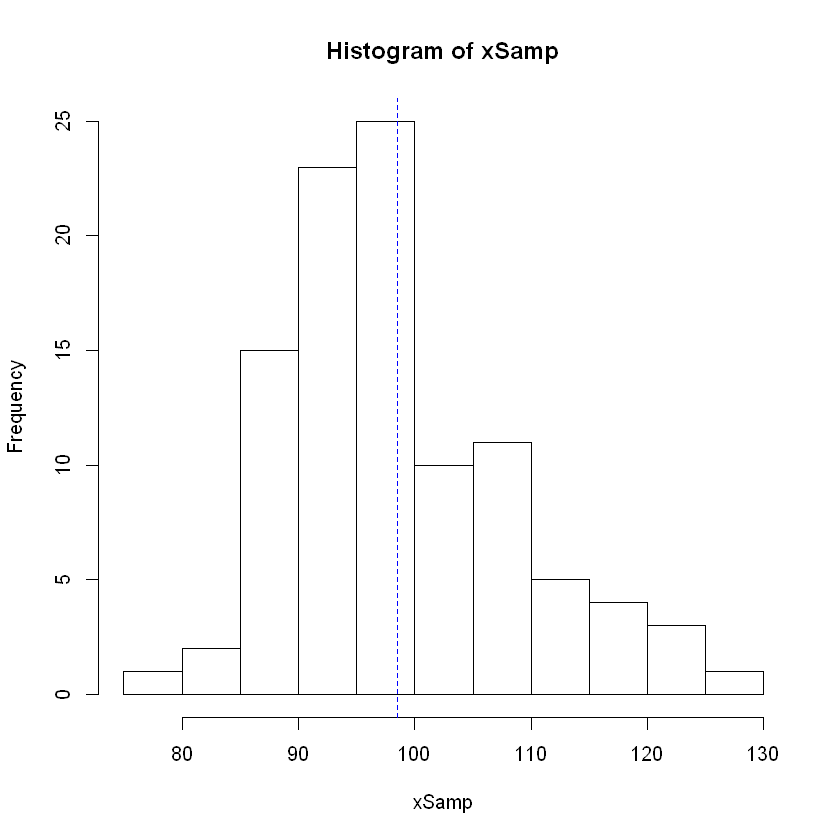

In [257]:
hist(xSamp)
abline(v=mean(xSamp), col="blue", lty=2)

### Exercise 2: Graph distribution of sample means
#### Distributions of sample means -- draw 100, graph, graph standard deviation

In [258]:
means = 1:100

for (i in 1:100){
  means[i] = mean(rnorm(100, mean=100, sd=10))
}

### Exercise 4: Compare sd of sample to theoretical sd
#### Get standard deviation of sample, and theoretical standard deviation

In [259]:
sd(means)

print("theoretical value:")
10/sqrt(100) #standard deviation / sqrt(n samples)

[1] 0.9806511

[1] "theoretical value:"


[1] 1

### Exercise 3/5: Creating histograms of sample means with mean abline, SEM arrow
#### Create a histogram of sampled means, with a abline at the mean, and an arrow showing the SEM of the means

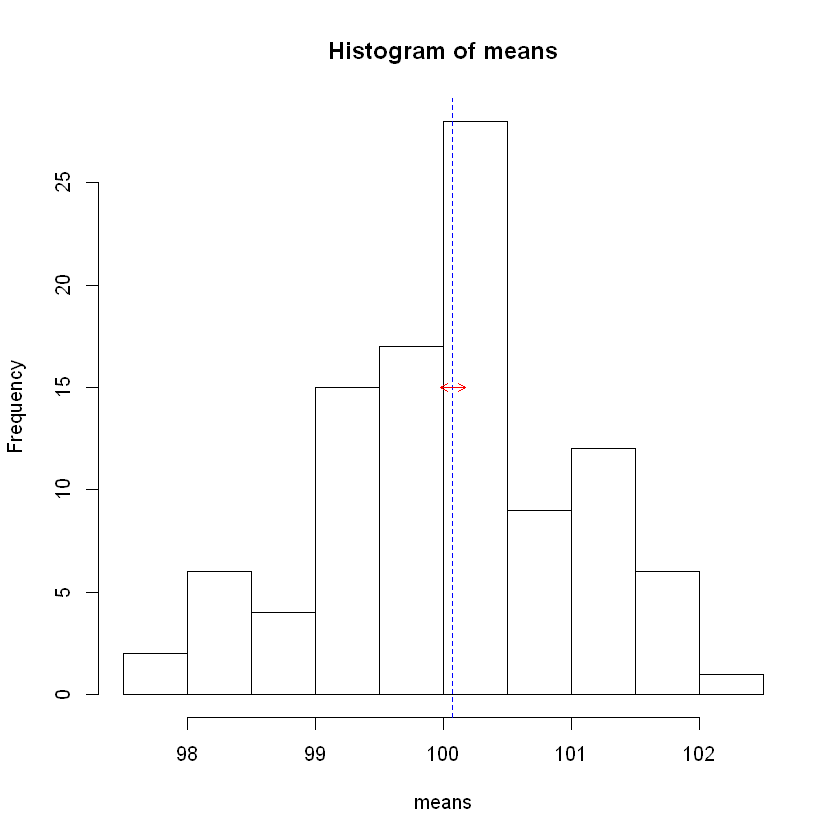

In [260]:
hist(means)
abline(v=mean(means), col="blue", lty=2)

sem = sd(means)/sqrt(length(means))
arrows((-sem+mean(means)),15,(sem+mean(means)),15, length =.07, code=3, col="red") #Creating an arrow

### Exercise 6/7: Creating multiple samples from normal with for loop and sapply
#### Create array with many samples from the normal distribution, save sample mean in an array
Using for loops

In [261]:
set.seed(1) #needs to be done for consistency w. conf interval calculation
samples = c(10,20,50,100,200,500,1000)
loops = 1:length(samples)
new_means = vector('numeric', length(samples))
  
for (i in loops) {
  new_means[i] = mean(rnorm(samples[i],mean=100,sd=10))
}

Using sapply syntax

In [262]:
set.seed(1) #needs to be done for consistency w. conf interval calculation
sampMeans <- rep(0,length(samples))
sampMeans <- sapply( samples, function(x) mean(rnorm(x,mean=100,sd=10)) )

### Exercise 8: Plotting sample means, adding confidence interval lines/
#### Plot the sample mean as a function of sample size. 
#### Add three curves for theoretical mean (solid line), range of 95% confidence (dotted lines)

In [263]:
#function to find confidence intervals for a value
set.seed(1) #needs to be done for consistency w. conf interval calculation
find_conf_int = function(sample, mean=100, sd=100){
  means = (rnorm(sample,mean=100,sd=10))
  conf_int = sd(means)/sqrt(length(means))*1.96 #formula for confidence interval, follows from normal distribution
  return(conf_int)
}

conf_ints = 1:length(samples)
for(i in 1:length(samples)){
  conf_ints[i] = find_conf_int(samples[i])
}

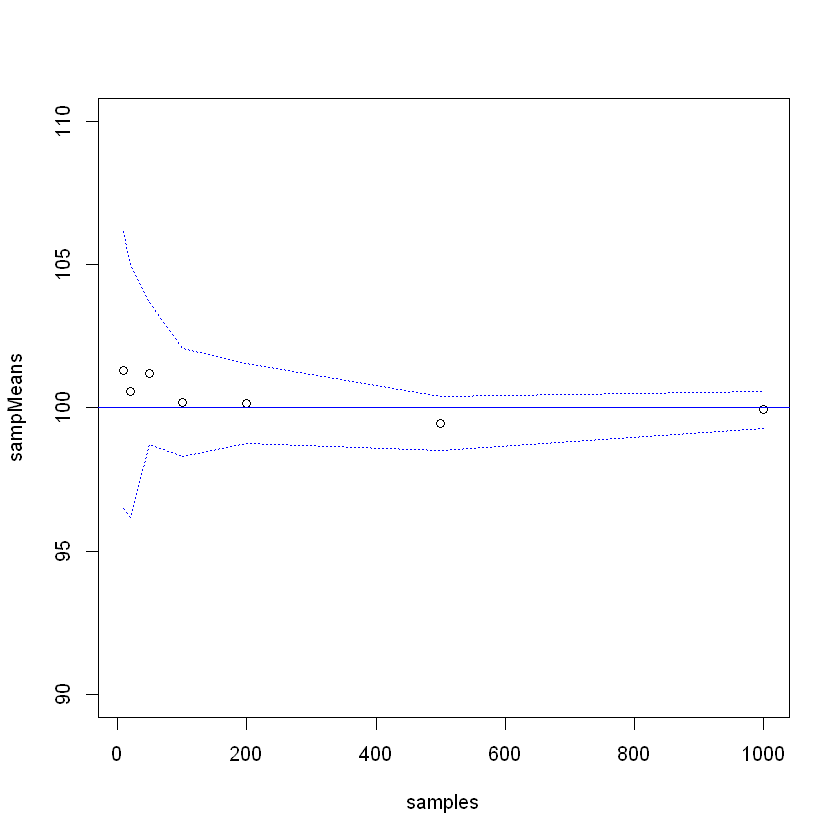

In [264]:
plot(samples, sampMeans, ylim=c(90,110))
abline(h=100, col="blue", lty=1)
# plot the confidence intervals
lines(samples, sampMeans+conf_ints, col="blue", lty=3)
lines(samples, sampMeans-conf_ints, col="blue", lty=3)

# Tutorial 2
This is all the major things done in tutorial 2

In [265]:
options(show.signif.stars=FALSE) #get rid of significance stars
require(car) #should already be loaded

#### Find sample size

In [266]:
nrow(Davis)

[1] 200

#### Get scatterplot of data

21 
21

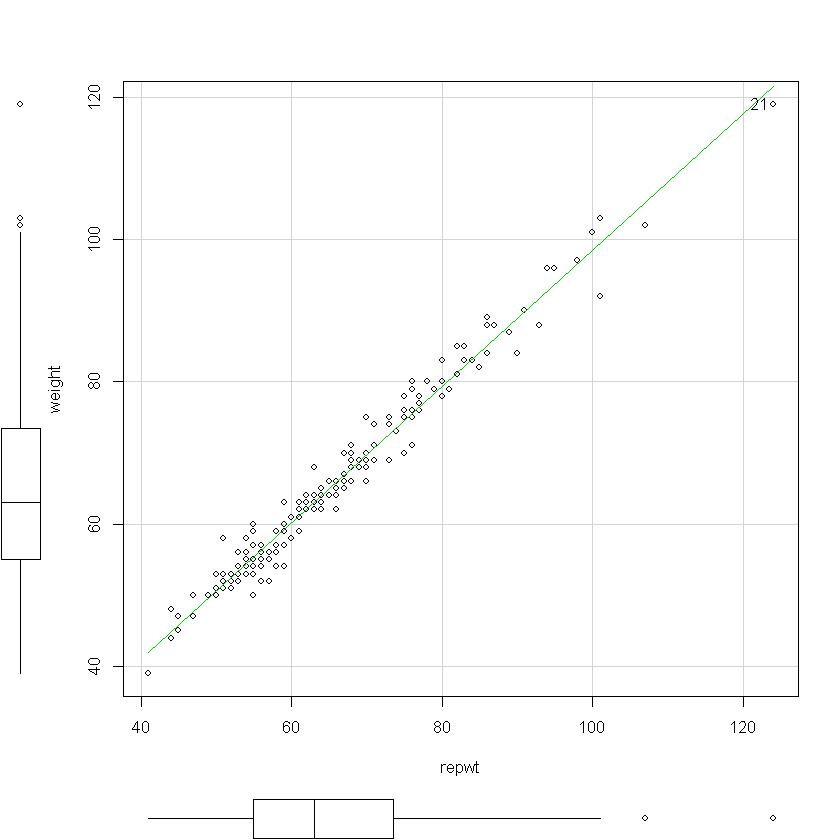

In [267]:
scatterplot(weight ~ repwt, data=Davis, smooth=FALSE, id.n=1)

#### Perform bivariate regression

In [268]:
davis.mod <- lm(weight ~ repwt, data=Davis)
summary(davis.mod)


Call:
lm(formula = weight ~ repwt, data = Davis)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5270 -1.0942 -0.1151  1.1133  6.3834 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.7480     0.8109   3.389 0.000862
repwt         0.9582     0.0121  79.222  < 2e-16

Residual standard error: 2.248 on 181 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.972,	Adjusted R-squared:  0.9718 
F-statistic:  6276 on 1 and 181 DF,  p-value: < 2.2e-16


### Exercise 1: Get coefficients of bivariate model
#### Get coefficients for bivariate regression model using equations for bivariate regression

Get rid of NA's

In [269]:
idxfull = complete.cases(Davis[,c("weight","repwt")]) #get only indices with no missing values
Davis_nona = Davis[idxfull,] #subset to only non-missing values

Get coefficients

In [270]:
x = Davis_nona$repwt #get y values
y = Davis_nona$weight #get x values

x_bar = mean(x) #get means
y_bar = mean(y)

x_dev = x - x_bar #get deivations from mean aka residuals
y_dev = y - y_bar

SXY = sum(x_dev*y_dev) #get sum of x*y resids
SXX = sum(x_dev*x_dev) #get sum of x*x resids

b = SXY/SXX #coefficient = sum of x*y/sum of x*x

Get confidence intervals on these parameters

In [271]:
confint(davis.mod)

,2.5 %,97.5 %
(Intercept),1.1478950,4.3480725
repwt,0.9343423,0.9820736


#### Update model to delete outlier

In [272]:
davis.mod.2 <- update(davis.mod, subset=-12)
summary(davis.mod.2)


Call:
lm(formula = weight ~ repwt, data = Davis, subset = -12)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5296 -1.1010 -0.1322  1.1287  6.3891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.73380    0.81479   3.355 0.000967
repwt        0.95837    0.01214  78.926  < 2e-16

Residual standard error: 2.254 on 180 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.9719,	Adjusted R-squared:  0.9718 
F-statistic:  6229 on 1 and 180 DF,  p-value: < 2.2e-16


#### compare coefficients of two models

In [273]:
cbind(Original=coef(davis.mod), NoCase12=coef(davis.mod.2))


,Original,NoCase12
(Intercept),2.7479837,2.7338020
repwt,0.9582079,0.9583743


### Exercise 2: Do multivariate regression, compare coefficients to bivariate

#### Do multivariate regression

Investigate dataset

In [274]:
head(Prestige)
nrow(Prestige)

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


[1] 102

#### Scatterplot matrix
Look at scatterplot of data

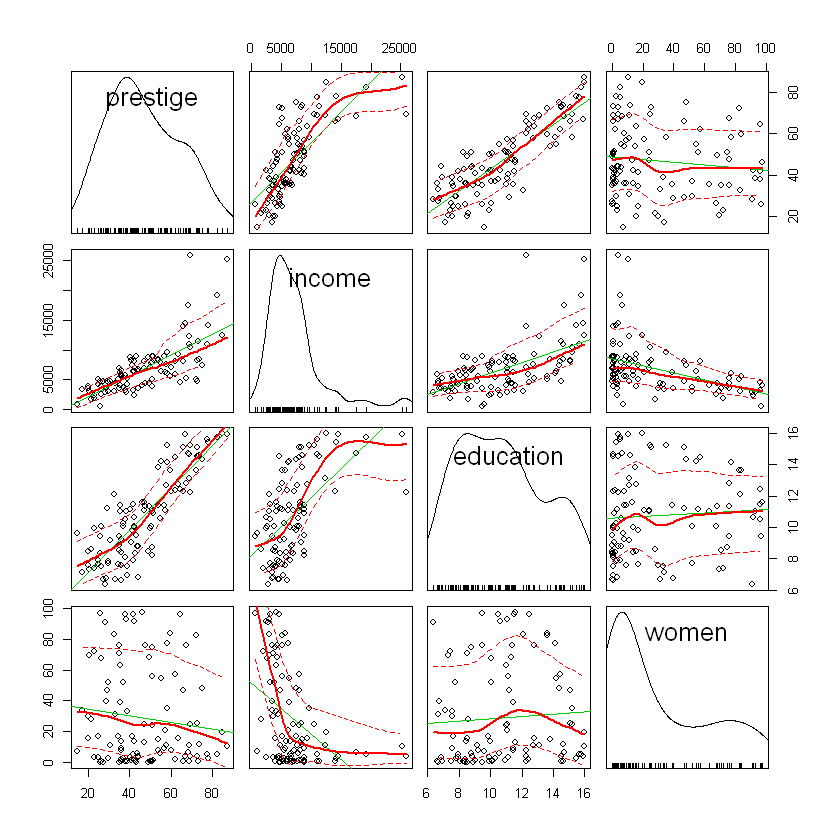

In [275]:
scatterplotMatrix(~prestige + income + education + women, span=0.7, data=Prestige)

Relationship to income does not look linear -- correct for this

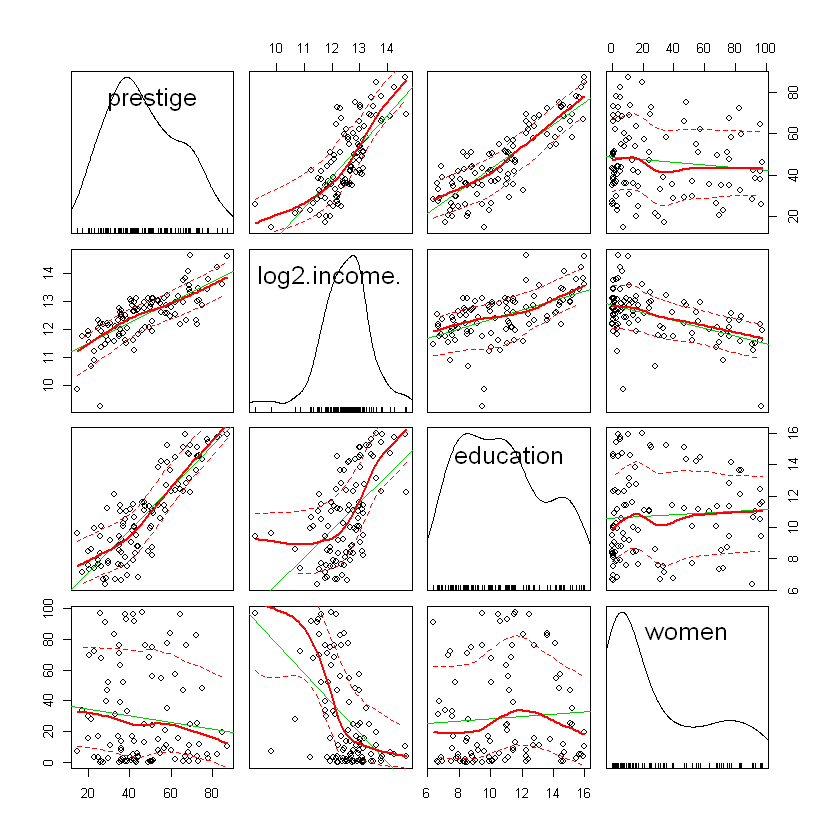

In [276]:
scatterplotMatrix(~prestige + log2(income) + education + women, span=0.7, data=Prestige)

#### Create model, get summary

In [277]:
prestige.mod <- lm(prestige ~ education + log2(income) + women,
    data=Prestige)
    
summary(prestige.mod)


Call:
lm(formula = prestige ~ education + log2(income) + women, data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.364  -4.429  -0.101   4.316  19.179 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  -110.9658    14.8429  -7.476 3.27e-11
education       3.7305     0.3544  10.527  < 2e-16
log2(income)    9.3147     1.3265   7.022 2.90e-10
women           0.0469     0.0299   1.568     0.12

Residual standard error: 7.093 on 98 degrees of freedom
Multiple R-squared:  0.8351,	Adjusted R-squared:   0.83 
F-statistic: 165.4 on 3 and 98 DF,  p-value: < 2.2e-16


#### Create table comparing both coefficients

In [278]:
#Get all bivariate coefficients
e_c = coef(lm(prestige ~ education,data=Prestige))
w_c = coef(lm(prestige ~ women,data=Prestige))
i_c = coef(lm(prestige ~ log2(income),data=Prestige))

#Get all multivariate coefficients
multi_coeffs = coef(prestige.mod)[2:4]

#Combine the bivariate coefficients into one table, minus intercepts
bi_coeffs = cbind(e_c,i_c,w_c)
bi_coeffs_only = cbind(bi_coeffs[2],bi_coeffs[4],bi_coeffs[6]) #ignoring intercepts

#Create the table for comparison and name it
coeff_table = rbind(bi_coeffs_only, multi_coeffs)
rownames(coeff_table) = c("bivariate_coeffs", "multivariate_coeffs")

head(coeff_table)

,education,log2(income),women
bivariate_coeffs,5.360878,14.941732,-0.06417284
multivariate_coeffs,3.730508,9.314666,0.04689514


### Factors in R

Investigating factors

In [279]:
Prestige$type # This shows all the data for type
class(Prestige$type)  # This tells us that R considers type to be a factor
levels(Prestige$type) # And this shows the levels of the factor

# You can specify the levels into different orders
Prestige$type <- with(Prestige, factor(type,
    levels=c("bc", "wc", "prof")))
select <- c(1, 2, 35, 36, 61, 62) # a few rows
Prestige$type[select]  # a few values

[1] prof prof prof prof prof prof prof prof prof prof prof prof prof prof prof
 [16] prof prof prof prof prof prof prof prof prof prof prof prof bc   prof prof
 [31] wc   prof wc   <NA> wc   wc   wc   wc   wc   wc   wc   wc   wc   wc   wc  
 [46] wc   wc   wc   wc   wc   wc   wc   <NA> bc   wc   wc   wc   bc   bc   bc  
 [61] bc   bc   <NA> bc   bc   bc   <NA> bc   bc   bc   bc   bc   bc   bc   bc  
 [76] bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc  
 [91] bc   bc   bc   bc   bc   prof bc   bc   bc   bc   bc   bc  
Levels: bc wc prof

[1] "factor"

[1] "bc"   "wc"   "prof"

[1] prof prof wc   wc   bc   bc  
Levels: bc wc prof

Transforming factors

In [280]:
# This is just to show that factors could be transformed into numbers or characters (but warning the number transformation is not what you get from contrasts)
type.number <- as.numeric(Prestige$type)
type.number[select]
class(type.number)
type.character <- as.character(Prestige$type)
type.character[select]
class(type.character)
type.factor <- factor(type.character, levels=c("bc", "wc", "prof"))
type.factor[select]

[1] 3 3 2 2 1 1

[1] "numeric"

[1] "prof" "prof" "wc"   "wc"   "bc"   "bc"

[1] "character"

[1] prof prof wc   wc   bc   bc  
Levels: bc wc prof

Getting contrasts

In [281]:
# This shows you how contrasts work
(z <- factor(rep(c("a", "b", "c", "d"), c(3, 2, 4, 1))))
model.matrix(~ z)

[1] a a a b b c c c c d
Levels: a b c d

,(Intercept),zb,zc,zd
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,1,0,0
5,1,1,0,0
6,1,0,1,0
7,1,0,1,0
8,1,0,1,0
9,1,0,1,0
10,1,0,0,1


### Exercise 4: Contrasts for prestige$type

Q: What are the contrast for Prestige$type? First try to guess then and then use the contrasts command.

A: My expectation would be that there will be 1's at wc and prof and 0s elsewhere for the basic contrast, that should be sufficient for everything. This is because bc will be used as the "base" by R, the other two will be relative to this

In [282]:
contrasts(Prestige$type)

,wc,prof
bc,0,0
wc,1,0
prof,0,1


In [283]:
type_means= with(Prestige, tapply(prestige, type, mean))
head(type_means)

bc       wc     prof 
35.52727 42.24348 67.84839

### Exercise 5: Linear regression with type as a factor

Q: What values do you expect for the coefficients?
   
A: 
Values I expect for each:
bc - just the mean
wc - wc mean - bc mean 
prof - prof mean - bc mean

BC is the base used by R because it comes first in the alphabet.
The other two are just that coeff + another coeff large enough to get to the mean of the group overall.

Note: This is because we are just doing a bivariate regression -- for the full regression you could not predict these coefficients b/c instead of just finding means you are finding slopes

#### Run model, get summary

In [284]:
prestige.mod2 <- lm(prestige ~ as.factor(type), data=Prestige)
summary(prestige.mod2)


Call:
lm(formula = prestige ~ as.factor(type), data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2273  -7.1773  -0.0854   6.1174  25.2565 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)           35.527      1.432  24.810  < 2e-16
as.factor(type)wc      6.716      2.444   2.748  0.00718
as.factor(type)prof   32.321      2.227  14.511  < 2e-16

Residual standard error: 9.499 on 95 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.6976,	Adjusted R-squared:  0.6913 
F-statistic: 109.6 on 2 and 95 DF,  p-value: < 2.2e-16


#### Check predictions

In [285]:
round(coef(prestige.mod2)[1]) == round(type_means[1])

(Intercept) 
       TRUE

In [286]:
round(coef(prestige.mod2)[1] + coef(prestige.mod2)[2]) == round(type_means[2])

(Intercept) 
       TRUE

In [287]:
round(coef(prestige.mod2)[1] + coef(prestige.mod2)[3]) == round(type_means[3])

(Intercept) 
       TRUE

## Tutorial 3
This is all the major things done in tutorial 3

### Look at data

In [288]:
head(Davis) # first 6 rows
nrow(Davis)

sex,weight,height,repwt,repht
M,77,182,77,180
F,58,161,51,159
F,53,161,54,158
M,68,177,70,175
F,59,157,59,155
M,76,170,76,165


[1] 200

#### Show a scatter plot of the data

21 
21

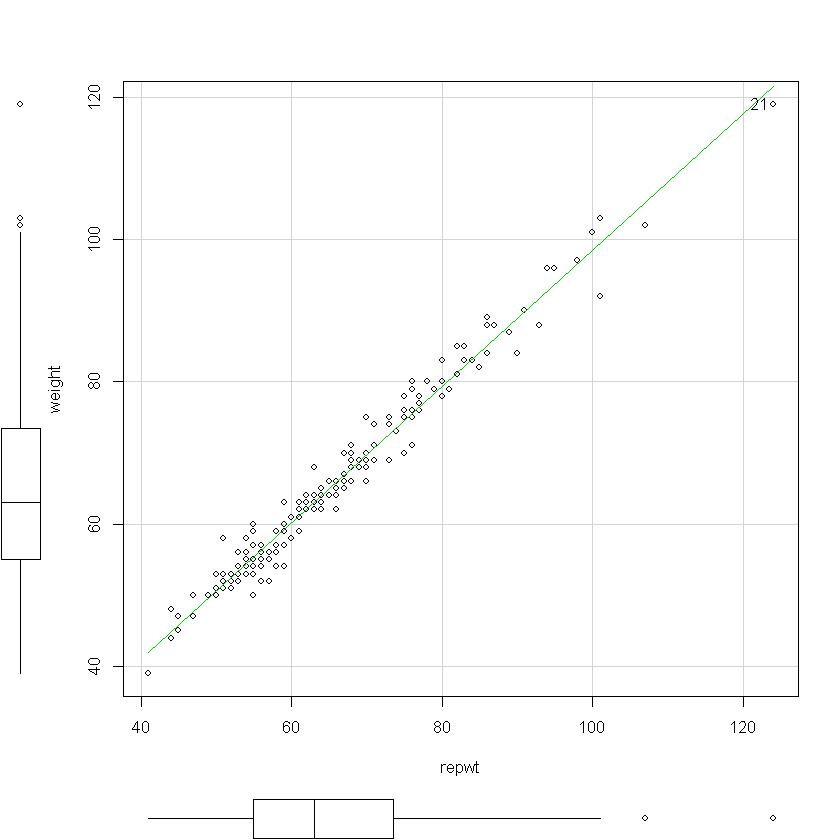

In [289]:
scatterplot(weight ~ repwt, data=Davis, smooth=FALSE, id.n=1)

#### Perform the bi-variate regression

In [290]:
davis.mod <- lm(weight ~ repwt, data=Davis)
davis.mod
summary(davis.mod)


Call:
lm(formula = weight ~ repwt, data = Davis)

Coefficients:
(Intercept)        repwt  
     2.7480       0.9582  



Call:
lm(formula = weight ~ repwt, data = Davis)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5270 -1.0942 -0.1151  1.1133  6.3834 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.7480     0.8109   3.389 0.000862
repwt         0.9582     0.0121  79.222  < 2e-16

Residual standard error: 2.248 on 181 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.972,	Adjusted R-squared:  0.9718 
F-statistic:  6276 on 1 and 181 DF,  p-value: < 2.2e-16


#### Get coefficients

In [291]:
b0 = davis.mod$coefficients[1]
b1 = davis.mod$coefficients[2]

#### Use coefficients to calculate yhat for a specific value (10) of repweight

In [292]:
repwt=10
value = b0 + repwt*b1
value

(Intercept) 
   12.33006

### Perform multivariate regression

#### We used the scatter plot command to look at the data and decided to use log2(income):

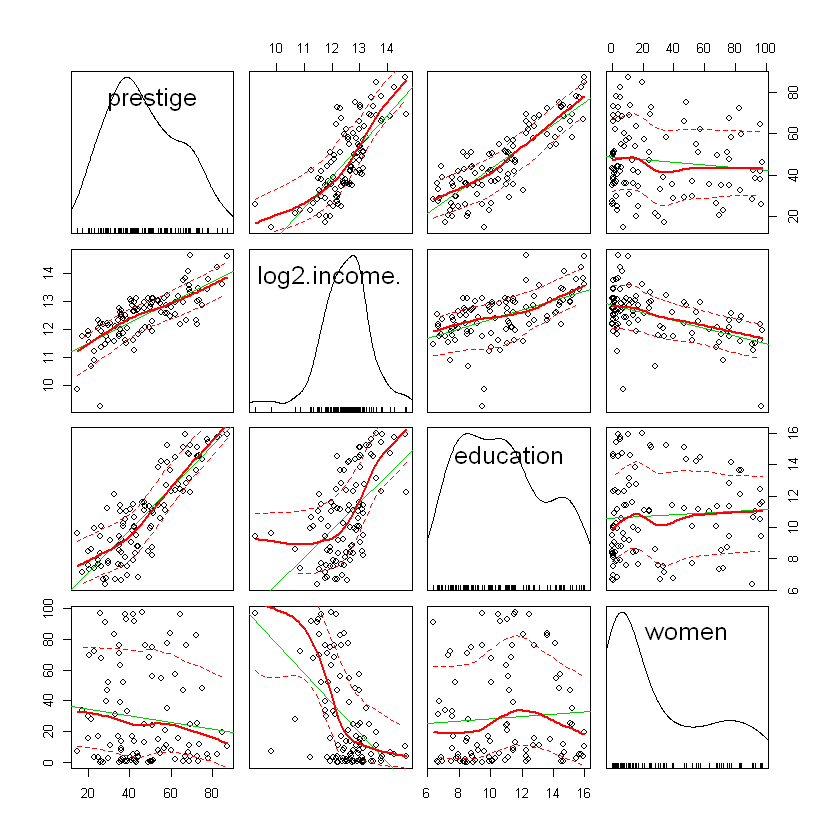

In [293]:
scatterplotMatrix(~prestige + log2(income) + education + women, span=0.7, data=Prestige)

#### Get multivariate model, show summary

In [294]:
prestige.mod <- lm(prestige ~ education + log2(income) + women,
    data=Prestige)
    
summary(prestige.mod)


Call:
lm(formula = prestige ~ education + log2(income) + women, data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.364  -4.429  -0.101   4.316  19.179 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  -110.9658    14.8429  -7.476 3.27e-11
education       3.7305     0.3544  10.527  < 2e-16
log2(income)    9.3147     1.3265   7.022 2.90e-10
women           0.0469     0.0299   1.568     0.12

Residual standard error: 7.093 on 98 degrees of freedom
Multiple R-squared:  0.8351,	Adjusted R-squared:   0.83 
F-statistic: 165.4 on 3 and 98 DF,  p-value: < 2.2e-16


### Exercise 1: Visualize fit of model

#### Plot the fit of the model, and add a y=x line (3 methods shown)

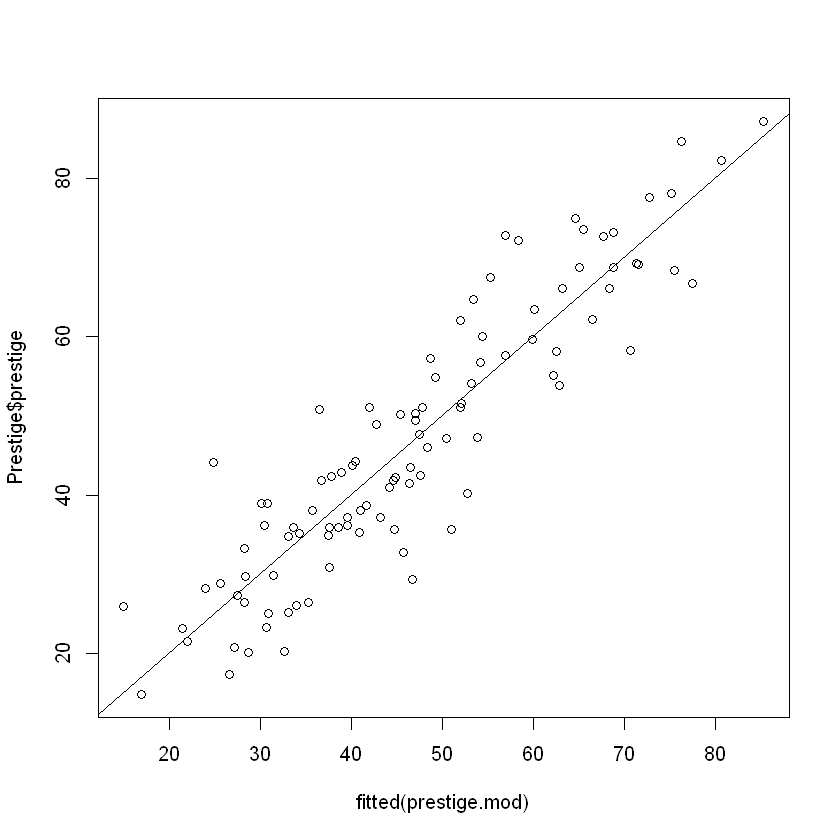

In [295]:
plot(fitted(prestige.mod),Prestige$prestige)
abline(c(0,1))
abline(0,1)
abline(a=0,b=1)

#### Get a leverage plot
shows the relationship between each variable and the main predictor

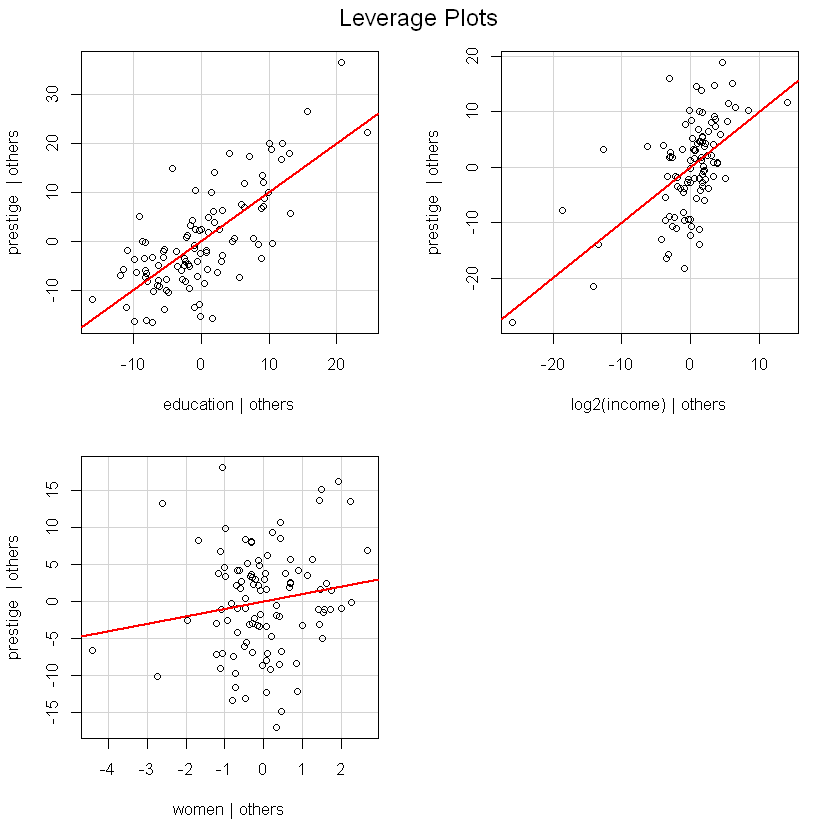

In [296]:
leveragePlots(prestige.mod)

#### Get a residual plot
This can be used to check if the assumptions of the linear model are violated. 

For example, the relationship might not be linear (red lines aren't straight), data might be heteroskedastic (variance increases over time). 

,Test stat,Pr(>|t|)
education,1.756,0.082
log2(income),0.585,0.560
women,2.277,0.025
Tukey test,0.763,0.445


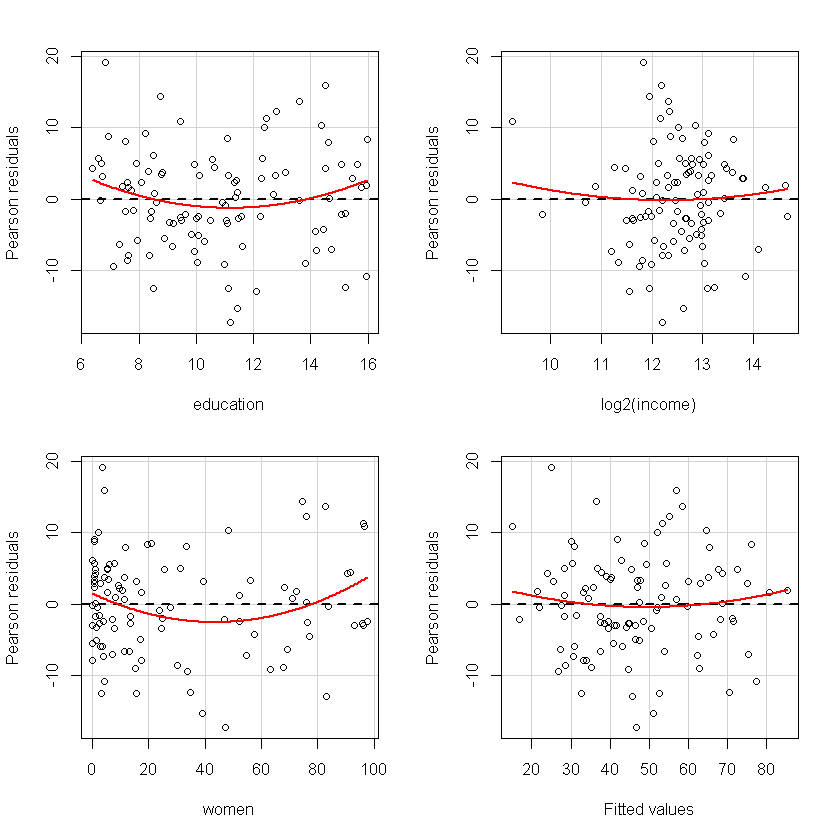

In [297]:
residualPlots(prestige.mod)

####  Get all the diagnostic plots at once
[How to interpret each of these plots](http://data.library.virginia.edu/diagnostic-plots/)
In residuals vs fitted, check for the line not being straight, and for variance not being equal. 

In the QQ plot, check for the relationship not being linear -- i.e. a line with heavy or light tails. 
[How to interpret a QQ plot](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot)

In residuals vs leverage, look for any data points outside the Cook's distance (dotted lines) -- that means they may be influencing things too much. 

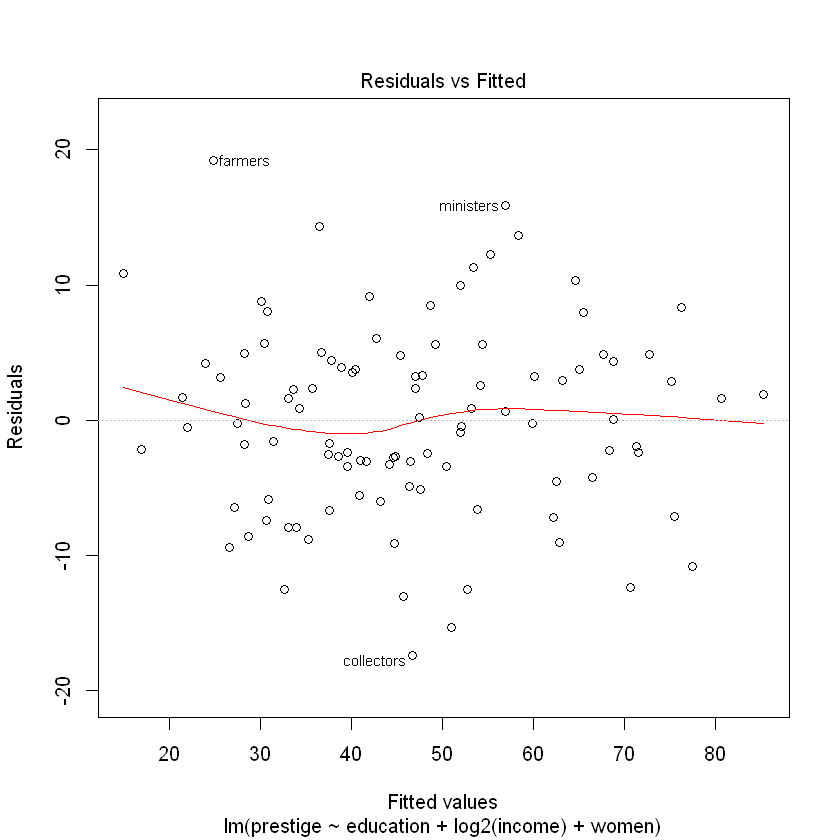

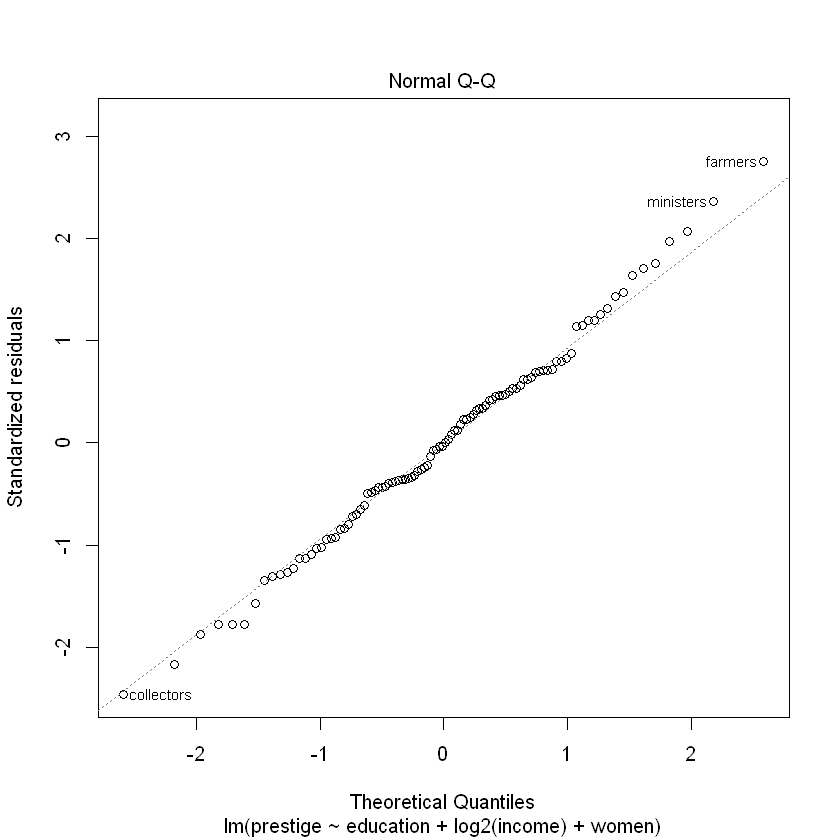

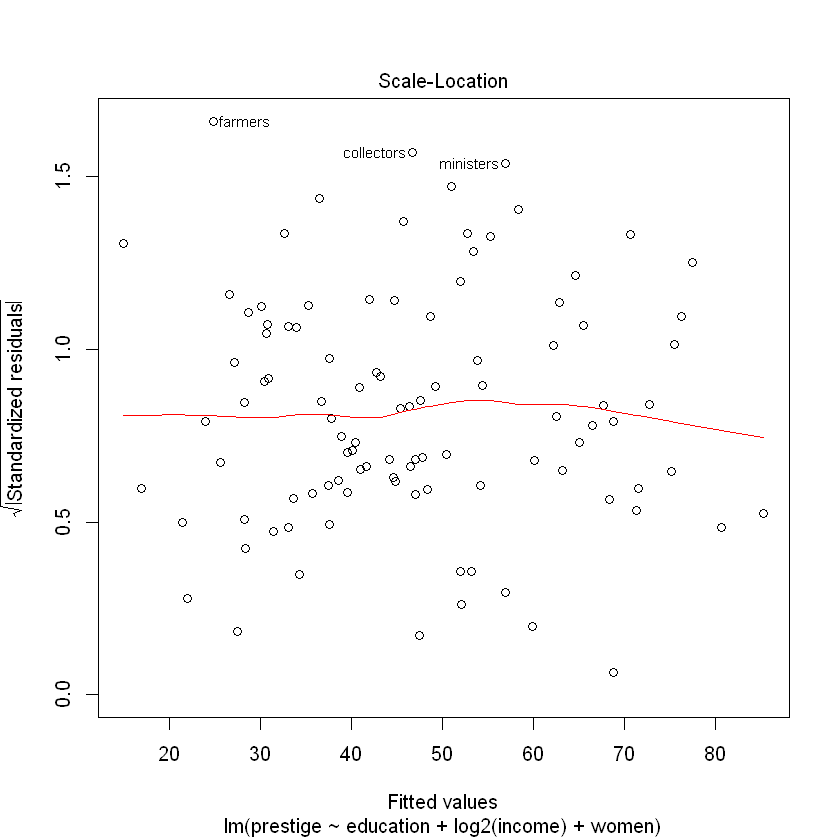

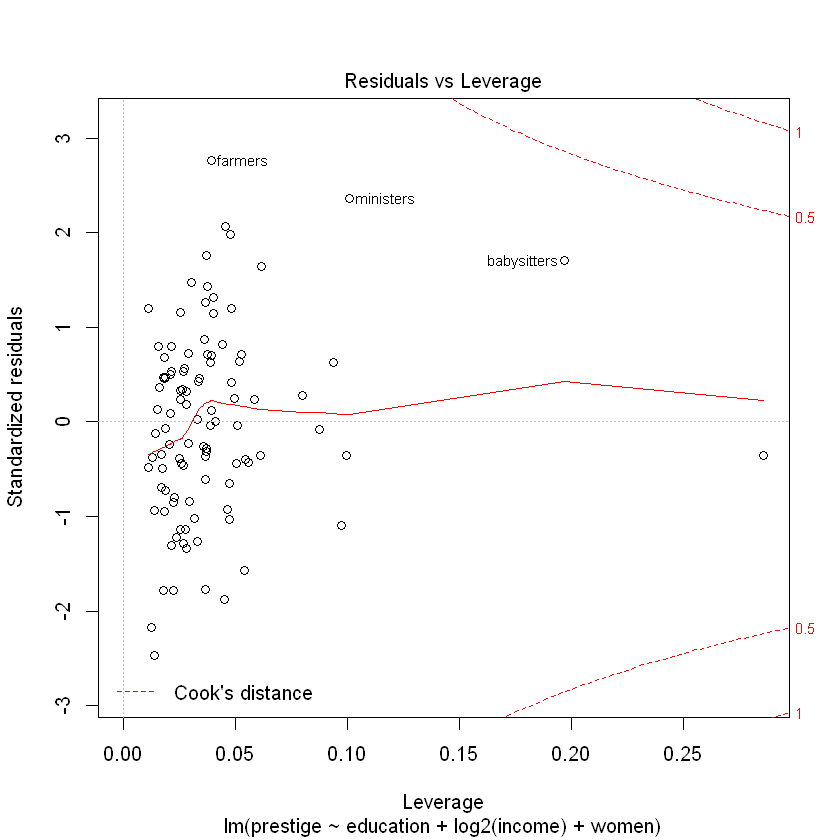

In [298]:
plot(prestige.mod)

### Interlude: ANOVAs, T-tests, and contrasts

The lm() can also be used predictor variables that are factors (also known as categorical or nominal variables).  

One-way ANOVA: If we only have one variable we are doing a one-way ANOVA. 

T-test: If the variable has two-levels it is a t-test.

The categorical variables are transformed into numeric variables called "contrasts".  You need k-1 contrast variables to code k levels. 

But remember that the linear model as j+1 parameters where j is the number of variables. So even though you might have 4 levels ie 3 variables, it is still 4 parameters in a linear model - level2,3,4 and an intercept representing level1

In [299]:
Prestige$type # This shows all the data for type
class(Prestige$type)  # This tells us that R considers type to be a factor
levels(Prestige$type) # And this shows the levels of the factor

[1] prof prof prof prof prof prof prof prof prof prof prof prof prof prof prof
 [16] prof prof prof prof prof prof prof prof prof prof prof prof bc   prof prof
 [31] wc   prof wc   <NA> wc   wc   wc   wc   wc   wc   wc   wc   wc   wc   wc  
 [46] wc   wc   wc   wc   wc   wc   wc   <NA> bc   wc   wc   wc   bc   bc   bc  
 [61] bc   bc   <NA> bc   bc   bc   <NA> bc   bc   bc   bc   bc   bc   bc   bc  
 [76] bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc  
 [91] bc   bc   bc   bc   bc   prof bc   bc   bc   bc   bc   bc  
Levels: bc wc prof

[1] "factor"

[1] "bc"   "wc"   "prof"

#### Show contrasts for type

In [300]:
contrasts(Prestige$type)

,wc,prof
bc,0,0
wc,1,0
prof,0,1


#### Find mean values for each factor in type

In [301]:
with(Prestige, tapply(prestige, type, mean))

bc       wc     prof 
35.52727 42.24348 67.84839

#### One way ANOVA

In [302]:
prestige.mod.type = lm(prestige ~ type, data=Prestige)
summary(prestige.mod.type)


Call:
lm(formula = prestige ~ type, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2273  -7.1773  -0.0854   6.1174  25.2565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   35.527      1.432  24.810  < 2e-16
typewc         6.716      2.444   2.748  0.00718
typeprof      32.321      2.227  14.511  < 2e-16

Residual standard error: 9.499 on 95 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.6976,	Adjusted R-squared:  0.6913 
F-statistic: 109.6 on 2 and 95 DF,  p-value: < 2.2e-16


#### Additional one way ANOVA example

In [303]:
set.seed(1234) # to reproduce results in the text

some(Baumann) # sample 10 observations
nrow(Baumann)
xtabs(~ group, data=Baumann)
with(Baumann, tapply(post.test.3, group, mean))
with(Baumann, tapply(post.test.3, group, sd))

,group,pretest.1,pretest.2,post.test.1,post.test.2,post.test.3
1,Basal,4,3,5,4,41
8,Basal,12,7,5,5,32
14,Basal,12,2,8,8,44
30,DRTA,8,7,13,5,53
39,DRTA,9,5,12,6,54
40,DRTA,13,6,10,6,41
41,DRTA,10,2,11,6,49
54,Strat,9,5,7,11,42
63,Strat,14,4,15,7,49
64,Strat,8,2,9,5,33


[1] 66

group
Basal  DRTA Strat 
   22    22    22 

Basal     DRTA    Strat 
41.04545 46.72727 44.27273

Basal     DRTA    Strat 
5.635578 7.388420 5.766750

Plot results

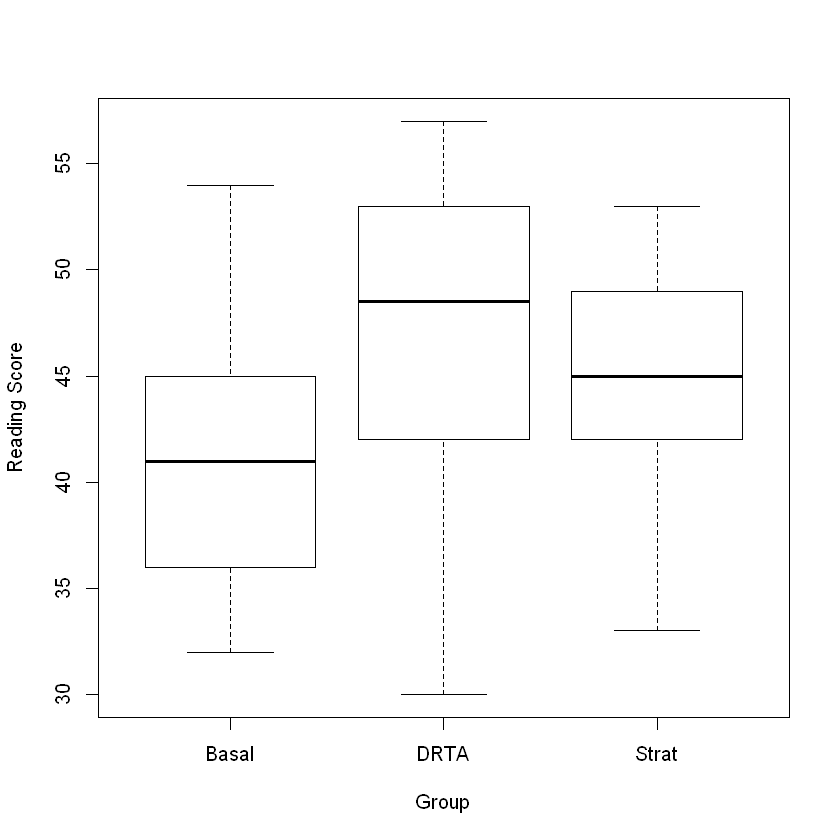

In [304]:
plot(post.test.3 ~ group, data=Baumann, xlab="Group",
     ylab="Reading Score")

Get summary of model

In [305]:
baum.mod.1 <- lm(post.test.3 ~ group, data=Baumann)
summary(baum.mod.1)


Call:
lm(formula = post.test.3 ~ group, data = Baumann)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.727  -3.614   1.114   3.954  12.954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   41.045      1.346  30.490  < 2e-16
groupDRTA      5.682      1.904   2.985  0.00404
groupStrat     3.227      1.904   1.695  0.09498

Residual standard error: 6.314 on 63 degrees of freedom
Multiple R-squared:  0.1245,	Adjusted R-squared:  0.09675 
F-statistic: 4.481 on 2 and 63 DF,  p-value: 0.01515


#### Change your reference level -- note, the easier way is just to re-order the levels of the factor

In [306]:
summary(update(baum.mod.1, . ~ . - group +
    relevel(group, ref="DRTA")))


Call:
lm(formula = post.test.3 ~ relevel(group, ref = "DRTA"), data = Baumann)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.727  -3.614   1.114   3.954  12.954 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                         46.727      1.346  34.711  < 2e-16
relevel(group, ref = "DRTA")Basal   -5.682      1.904  -2.985  0.00404
relevel(group, ref = "DRTA")Strat   -2.455      1.904  -1.289  0.20201

Residual standard error: 6.314 on 63 degrees of freedom
Multiple R-squared:  0.1245,	Adjusted R-squared:  0.09675 
F-statistic: 4.481 on 2 and 63 DF,  p-value: 0.01515


#### ANCOVA

You can also have a mixture of facotrs and numerical predictors in an `lm()`, called an ANCOVA - analysis of covariance. In this example we aren't doing any interactions. 

ANCOVA = A linear model with a categorical and continous predictor

Look at the data

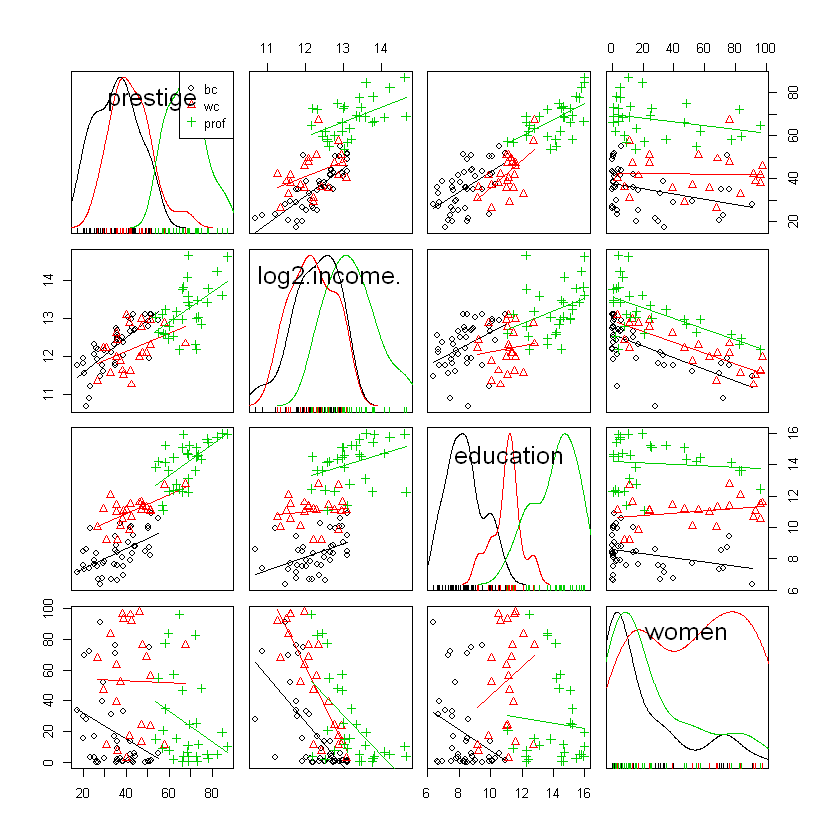

In [308]:
scatterplotMatrix(~ prestige + log2(income) + education + women | type, data=Prestige, by.group=TRUE, id.n=0,
smooth=FALSE)

Identical to initial model, but minus women

In [309]:
prestige.mod.1 <- update(prestige.mod, ~ . - women + type) # ~. means same outcome, same predictors, minus women
summary(prestige.mod.1)


Call:
lm(formula = prestige ~ education + log2(income) + type, data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.511  -3.746   1.011   4.356  18.438 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  -81.2019    13.7431  -5.909 5.63e-08
education      3.2845     0.6081   5.401 5.06e-07
log2(income)   7.2694     1.1900   6.109 2.31e-08
typewc        -1.4394     2.3780  -0.605   0.5465
typeprof       6.7509     3.6185   1.866   0.0652

Residual standard error: 6.637 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8555,	Adjusted R-squared:  0.8493 
F-statistic: 137.6 on 4 and 93 DF,  p-value: < 2.2e-16


ANCOVA similar to above but with log transformed income

In [310]:
prestige.mod.1b = lm(prestige ~ . -women -census, data=Prestige) #similar except didnt log transform income
summary(prestige.mod.1b)


Call:
lm(formula = prestige ~ . - women - census, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9529  -4.4486   0.1678   5.0566  18.6320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.6229292  5.2275255  -0.119    0.905
education    3.6731661  0.6405016   5.735 1.21e-07
income       0.0010132  0.0002209   4.586 1.40e-05
typewc      -2.7372307  2.5139324  -1.089    0.279
typeprof     6.0389707  3.8668551   1.562    0.122

Residual standard error: 7.095 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.8278 
F-statistic: 117.5 on 4 and 93 DF,  p-value: < 2.2e-16


#### Estimate adjusted means -- means when mean of covariates is taken into account


 type effect
type
      bc       wc     prof 
47.01505 45.57565 53.76594 

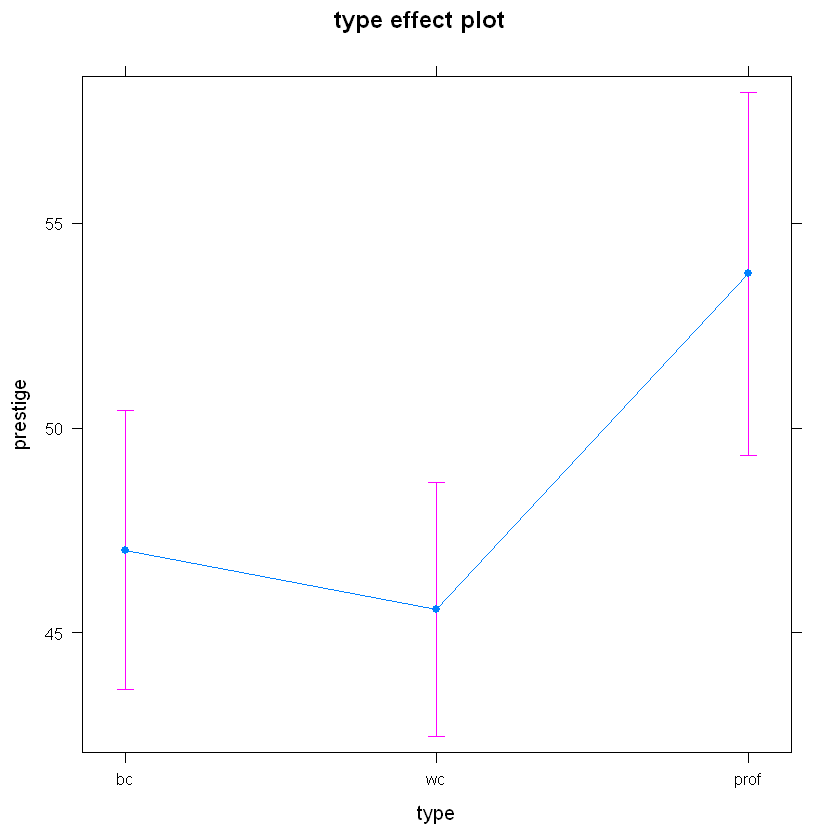

In [311]:
effect("type", prestige.mod.1)
plot(effect("type", prestige.mod.1))

In [312]:
summary(effect("type", prestige.mod.1))


 type effect
type
      bc       wc     prof 
47.01505 45.57565 53.76594 

 Lower 95 Percent Confidence Limits
type
      bc       wc     prof 
43.61336 42.47173 49.34127 

 Upper 95 Percent Confidence Limits
type
      bc       wc     prof 
50.41674 48.67956 58.19060 

#### Look at all the objects in the model

In [313]:
objects(prestige.mod.1)

[1] "assign"        "call"          "coefficients"  "contrasts"    
 [5] "df.residual"   "effects"       "fitted.values" "model"        
 [9] "na.action"     "qr"            "rank"          "residuals"    
[13] "terms"         "xlevels"

#### Plot fitted vs actual values

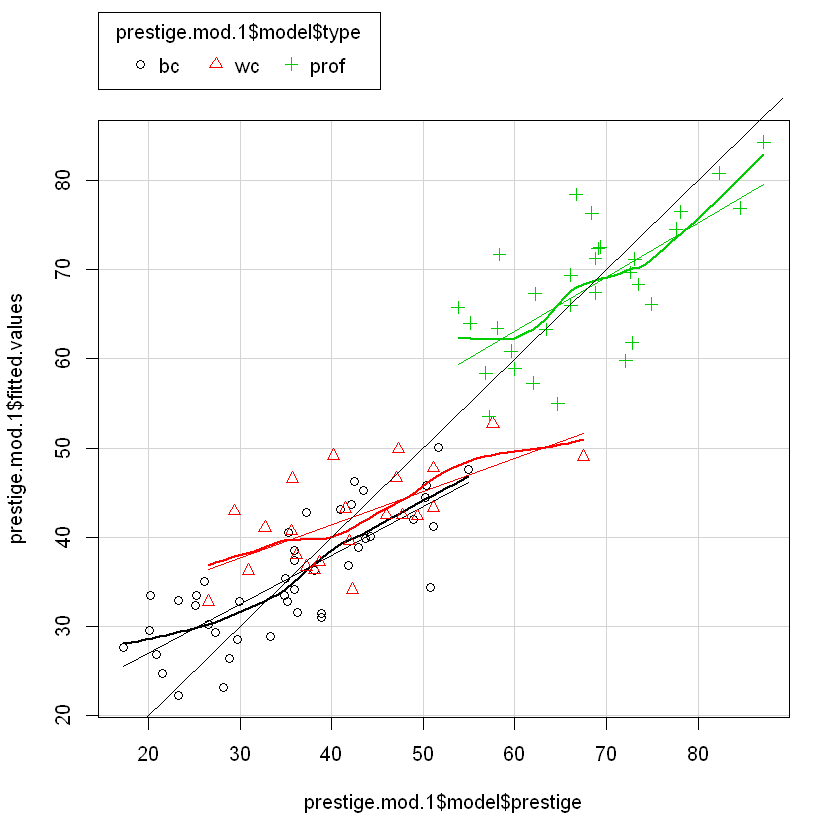

In [314]:
scatterplot(prestige.mod.1$model$prestige, prestige.mod.1$fitted.values, groups=prestige.mod.1$model$type)
abline(a=0,b=1)

In [315]:
### Exercise 2: Plot predictions that you would have gotten for each group without taking the profession type into account

Get coefficients, use to get predictions

In [316]:
p_coefs = coef(prestige.mod.1)
avg_coef = mean(c(p_coefs[1], p_coefs[1] + p_coefs[4], p_coefs[1] + p_coefs[5]))
ed_coef = p_coefs[2]
inc_coef = p_coefs[3]
avg_pred = avg_coef + ed_coef*prestige.mod.1$model$education + inc_coef*prestige.mod.1$model$'log2(income)'

Plot

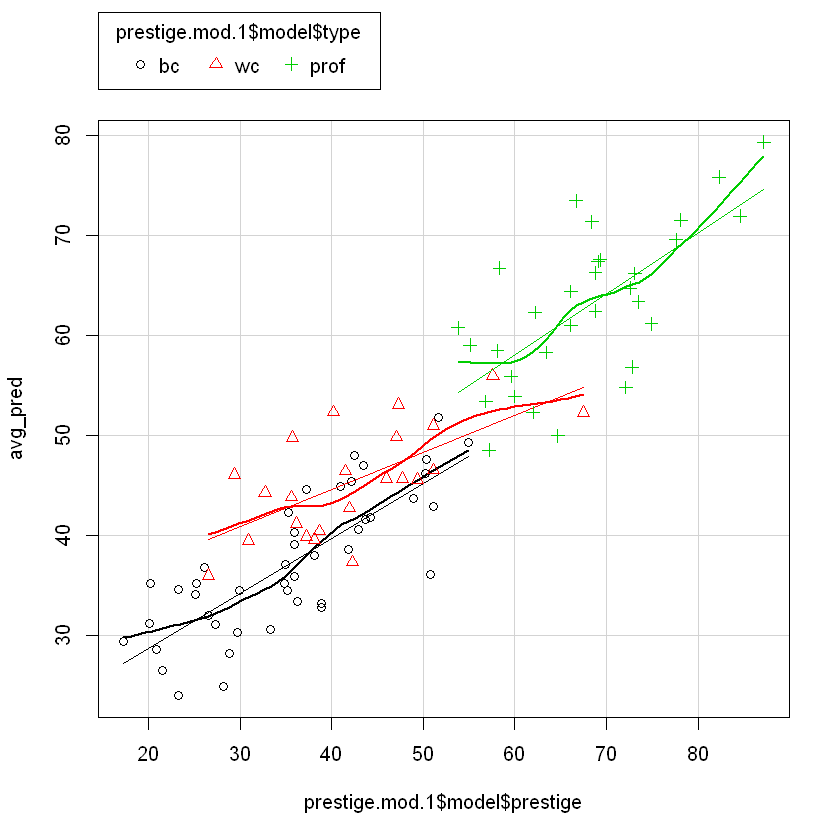

In [317]:
scatterplot(prestige.mod.1$model$prestige, avg_pred, groups=prestige.mod.1$model$type)

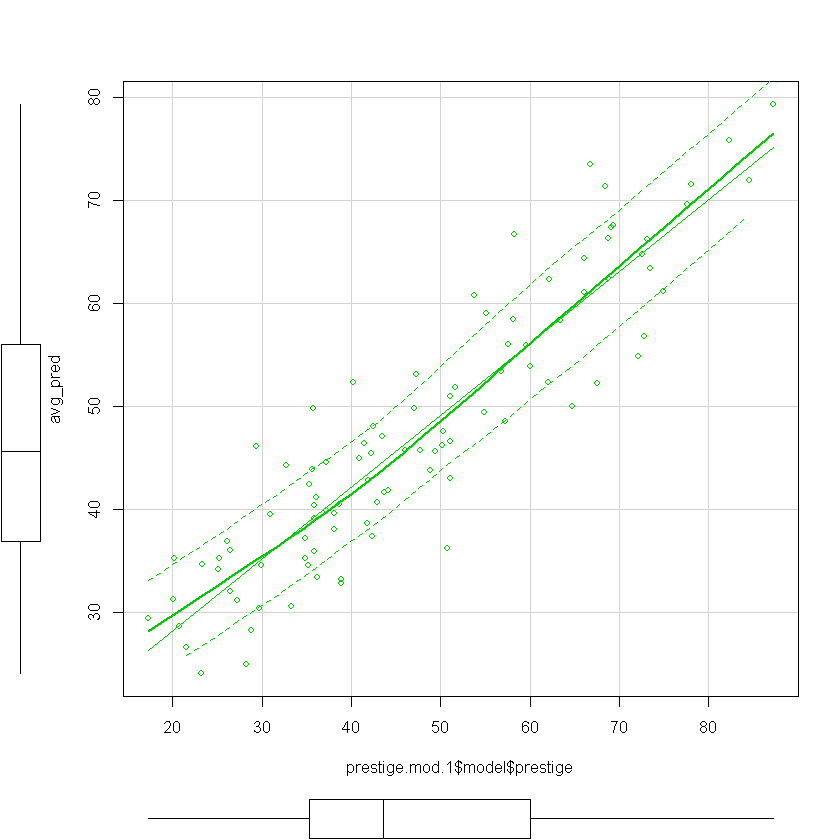

In [318]:
scatterplot(prestige.mod.1$model$prestige, avg_pred, col=prestige.mod.1$model$type)

#### Remainder of exercise 2


Call:
lm(formula = prestige ~ education + income, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -6.8477787  3.2189771  -2.127   0.0359
education    4.1374444  0.3489120  11.858  < 2e-16
income       0.0013612  0.0002242   6.071 2.36e-08

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = prestige ~ income * education, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0026  -5.1918   0.3768   4.5915  19.9312 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)      -2.207e+01  6.581e+00  -3.353 0.001136
income            3.944e-03  1.007e-03   3.918 0.000165
education         5.373e+00  5.797e-01   9.270 4.65e-15
income:education -1.961e-04  7.460e-05  -2.628 0.009958

Residual standard error: 7.587 on 98 degrees of freedom
Multiple R-squared:  0.8113,	Adjusted R-squared:  0.8055 
F-statistic: 140.5 on 3 and 98 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
99,6038.851,NA,NA,NA,NA
98,5641.156,1,397.695,6.908887,0.009957725


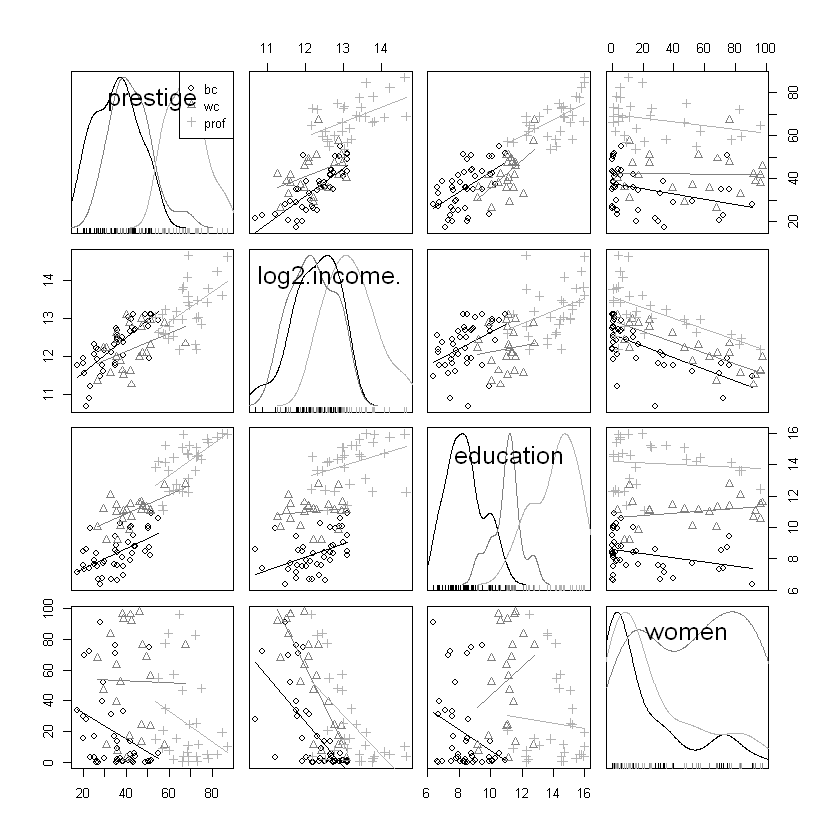


Call:
lm(formula = prestige ~ ns(income, df = 4), data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.404  -7.458  -2.533   8.234  32.980 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)           17.512      6.756   2.592 0.011019
ns(income, df = 4)1   27.271      6.776   4.024 0.000113
ns(income, df = 4)2   56.462      7.355   7.677 1.30e-11
ns(income, df = 4)3   78.286     15.699   4.987 2.69e-06
ns(income, df = 4)4   51.459      8.265   6.226 1.22e-08

Residual standard error: 11.14 on 97 degrees of freedom
Multiple R-squared:  0.597,	Adjusted R-squared:  0.5804 
F-statistic: 35.92 on 4 and 97 DF,  p-value: < 2.2e-16


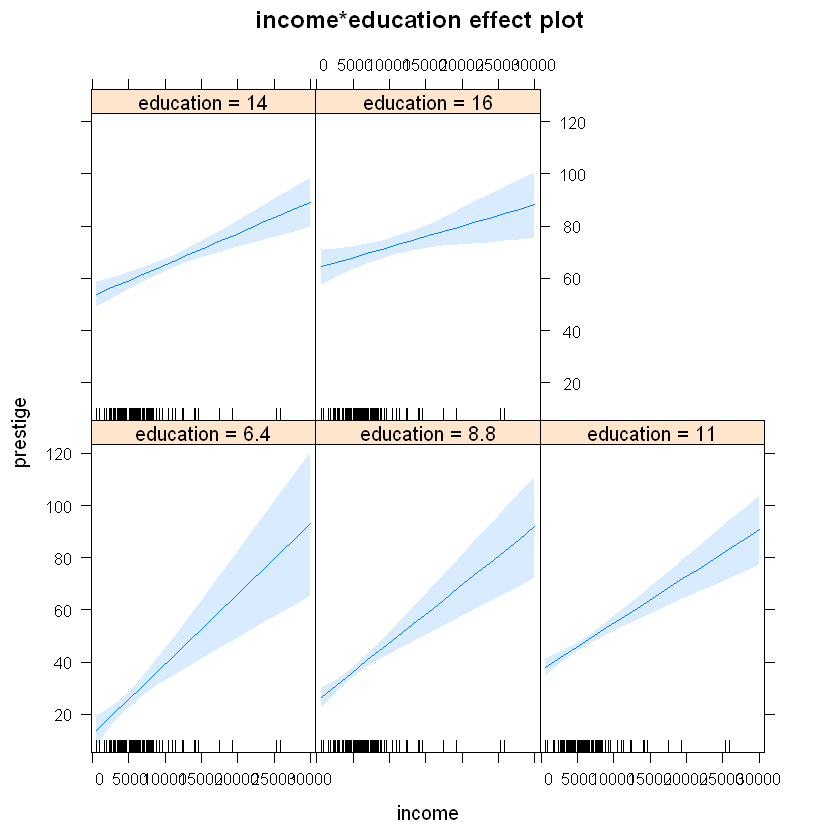

,(Intercept),typewc,typeprof,education,typewc:education,typeprof:education
gov.administrators,1,0,1,13.11,0.00,13.11
general.managers,1,0,1,12.26,0.00,12.26
typists,1,1,0,11.49,11.49,0.00
bookkeepers,1,1,0,11.32,11.32,0.00
launderers,1,0,0,7.33,0.00,0.00
janitors,1,0,0,7.11,0.00,0.00



Call:
lm(formula = prestige ~ education * type + log2(income) * type, 
    data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.970  -4.124   1.206   3.829  18.059 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           -120.0459    20.1576  -5.955 5.07e-08
education                2.3357     0.9277   2.518  0.01360
typewc                  30.2412    37.9788   0.796  0.42800
typeprof                85.1601    31.1810   2.731  0.00761
log2(income)            11.0782     1.8063   6.133 2.32e-08
education:typewc         3.6400     1.7589   2.069  0.04140
education:typeprof       0.6974     1.2895   0.541  0.58998
typewc:log2(income)     -5.6530     3.0519  -1.852  0.06730
typeprof:log2(income)   -6.5356     2.6167  -2.498  0.01434

Residual standard error: 6.409 on 89 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8595 
F-statistic: 75.15 on 8 and 89 DF,  p-


Call:
lm(formula = prestige ~ type * (education + log2(income)), data = Prestige)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.970  -4.124   1.206   3.829  18.059 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           -120.0459    20.1576  -5.955 5.07e-08
typewc                  30.2412    37.9788   0.796  0.42800
typeprof                85.1601    31.1810   2.731  0.00761
education                2.3357     0.9277   2.518  0.01360
log2(income)            11.0782     1.8063   6.133 2.32e-08
typewc:education         3.6400     1.7589   2.069  0.04140
typeprof:education       0.6974     1.2895   0.541  0.58998
typewc:log2(income)     -5.6530     3.0519  -1.852  0.06730
typeprof:log2(income)   -6.5356     2.6167  -2.498  0.01434

Residual standard error: 6.409 on 89 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8595 
F-statistic: 75.15 on 8 and 89 DF,  p-value: < 2

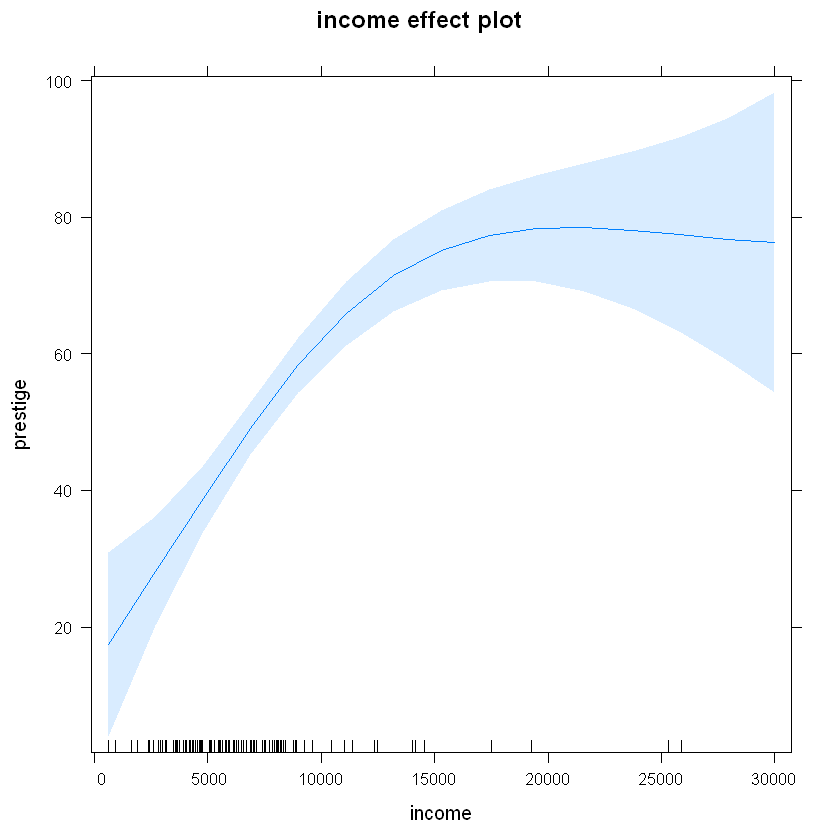

In [319]:

# ############################################
# lm() can also be used for modeling interactions.  THis is a form of "linearization" of non-linear effects.  
# Always visualize your data
scatterplotMatrix(~ prestige + log2(income) + education + women | type, data=Prestige, by.group=TRUE, id.n=0,
                  smooth=FALSE, col=gray(c(0,0.5,0.7)))

# Before looking at interactions, we are understanding how linear regression can be used to fit non-linear terms. This is done by adding "regressors".  K "predictors"  can be manipulated to generate many more (>K) "regressors".

# We can compare the model that predicts prestige with income and education as additive predictor variables with a model that also includes a multiplicative term.

prestige.mod.1 <- lm(prestige ~ education + income, data=Prestige)
prestige.mod.2 <- lm(prestige ~ income*education, data=Prestige) #review this some more -- unclear on how these coefficients work together
summary(prestige.mod.1)
summary(prestige.mod.2)

anova(prestige.mod.1,prestige.mod.2) #weaker st, sig p val means it improved things

library(effects)
plot(effect("income:education", prestige.mod.2))

# More generally one can fit a non-linear function with splines.
# Splines are piece-wise polynomial fits to function
library(splines)
prestige.mod.3 <- lm(prestige ~ ns(income, df=4), data=Prestige)
summary(prestige.mod.3)

# Let's display the effect.

plot(effect("ns(income, df=4)", prestige.mod.3))


# We are now going to do a ANACOVA demonstration with interaction
select <- c(1, 2, 35, 36, 61, 62) # a few rows

# The interaction term adds new variables in the models.  Interaction terms with factors are shown with :. R is smart and creates all the necessary additional terms.  Let's look at these:

model.matrix(~ type + education + education:type,
  data=Prestige)[select, ]
  
# There is more than one way to specify the equation the * is used for both the linear and the multiplicative term (interaction)  
prestige.mod.4a <- lm(prestige ~ education*type + log2(income)*type,
                      data=Prestige)
summary(prestige.mod.4a)

prestige.mod.4b <- lm(prestige ~ type*(education + log2(income)),
                      data=Prestige)
summary(prestige.mod.4b)

### Exercise 3: Plot results of ANCOVA, discuss results of diagnostic plots

Plot the result of this ANACOVA with interaction using the plot command and the effect command for education*type in model 4a.  Try also the leveragePlots() and residualsPlot(). Explain what you see.

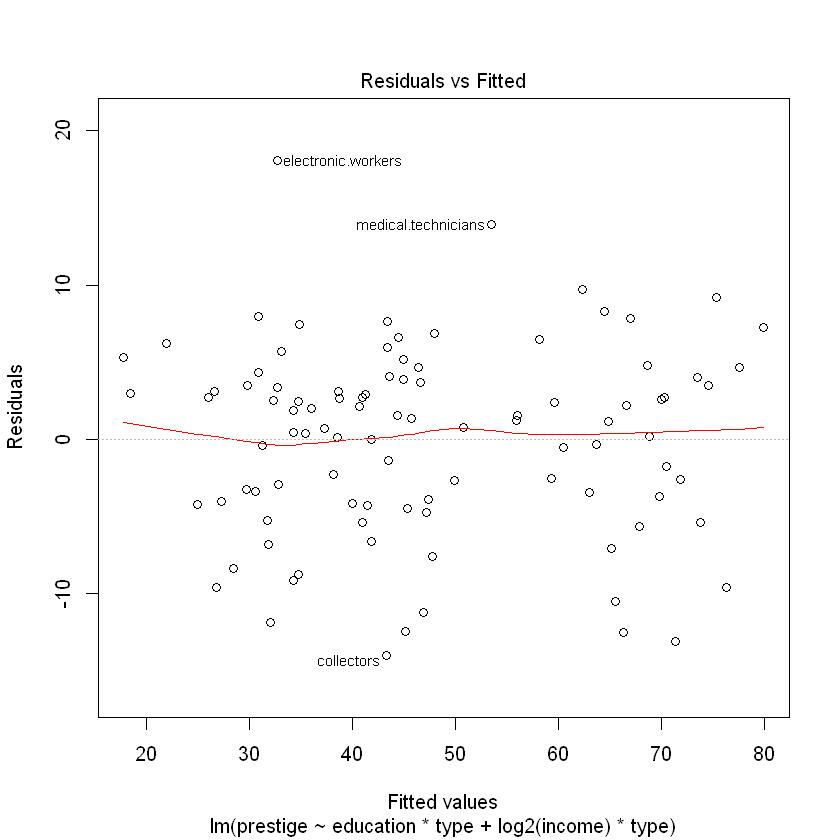

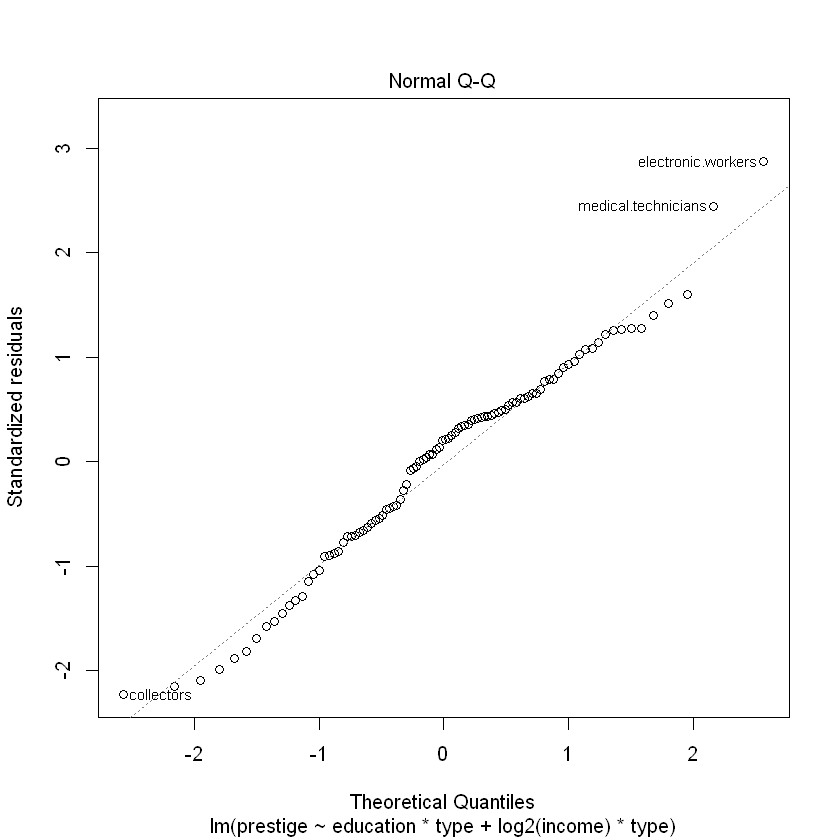

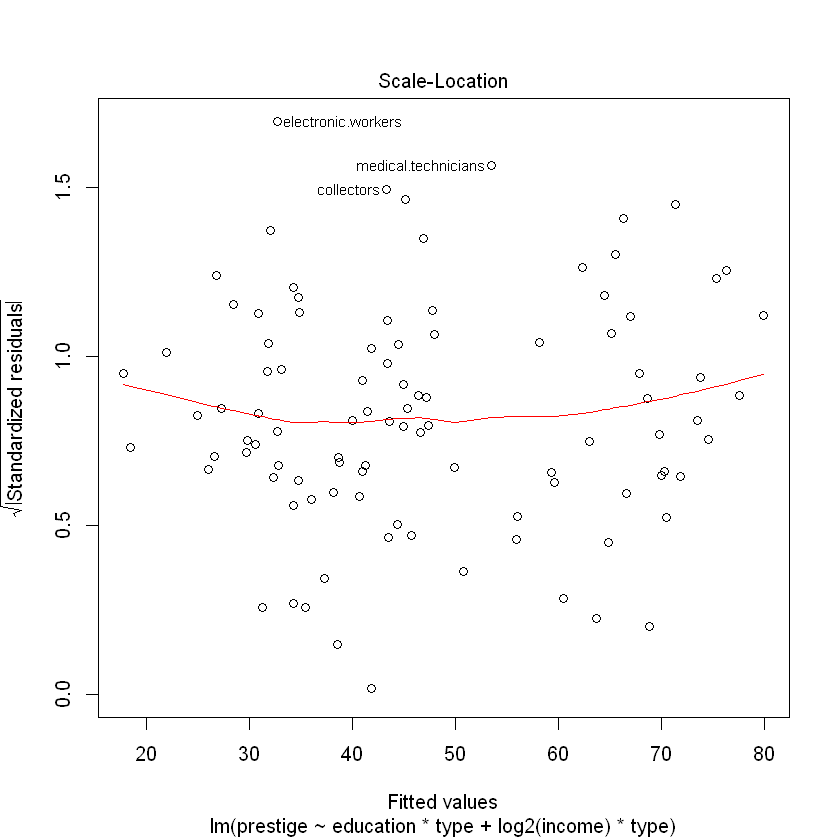

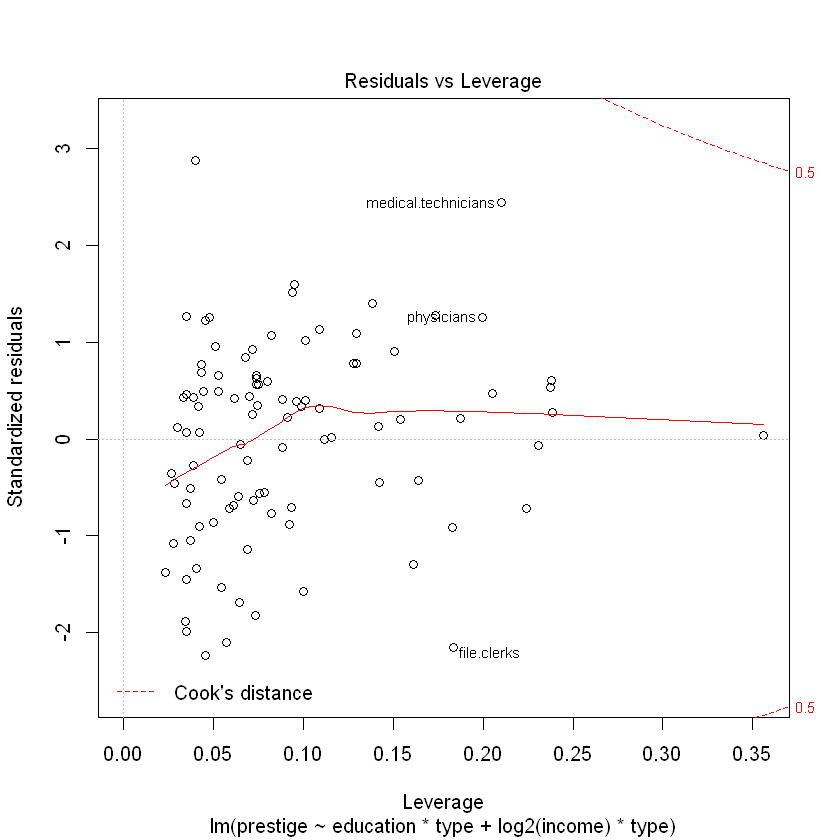

In [320]:
plot(prestige.mod.4a)
#Residuals v fitted looks all right -- there is not a distinctive pattern
#in the residuals which would imply that eg there is a non 
#linear relationship not being explained. 

#Normal Q-Q looks more or less ok, but it does have some deviation 
#at the tails of the data, and the center of the plot is slightly bowed
#ideally, all of the points would be clustered around the center line
#more tightly, without deviation, implying that they are normally 
#distributed. In this case, they aren't quite. So, we might not be 
#accounting for some of the variability in our data

#The scale-location plot confirms the above. There is a more noticeable
#bowing in the red line. So, it seems like homoscedacity might be 
# slightly violated here. There seems to be some heteroscedacity at the 
#edges of the range, as the fitted line goes up
#However, it doesn't look really bad -- e.g. like a cone, so I'm not
#necessarily too concerned. 

#the residuals v leverage plot looks ok. No points are outside cook's 
#distance lines -- you can barely see the lines at all. 
# While some are closer than others, overall this doesn't indicate an 
#issue with some points being too influential

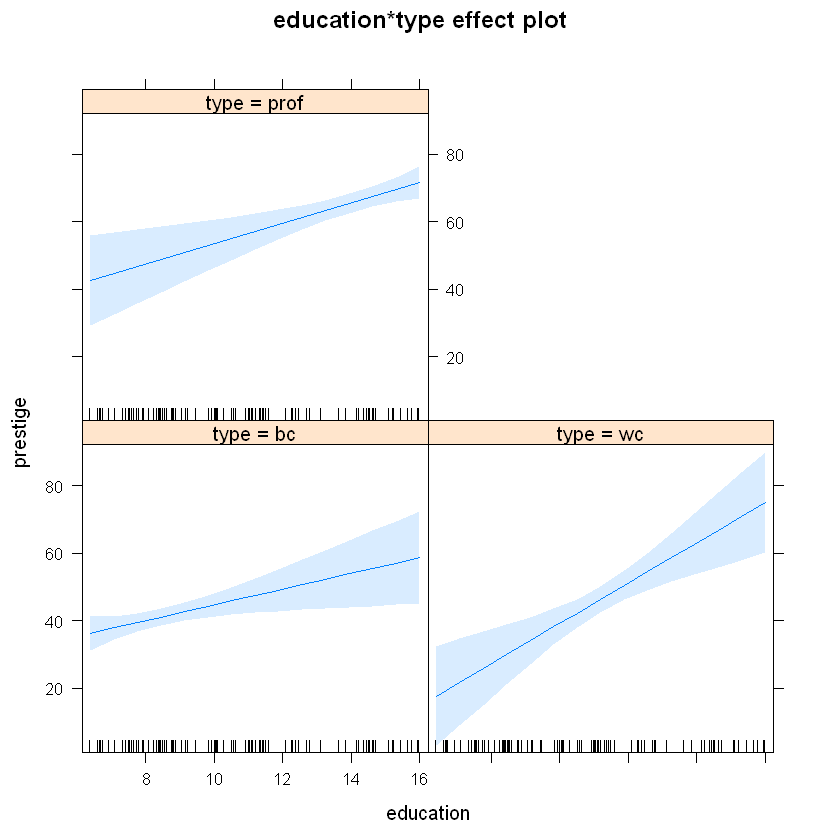

In [321]:
plot(effect("education*type", prestige.mod.4a))
#The slope is noticeably higher for white collar professions, 
# indicating that education has a larger effect on prestige for these
#professions than others

#However, they are all the same direction (positive), so this is a difference
#of degree, rather than totally changing the direction of 
#the relationship
#blue collar and professional don't appear to be significantly different, although the confidence interval for bc is much wider at many years of 
#education, and much lower for professional at the lower numbers of years
#of education. This could indicate that the effects are more variable
#in those ranges or we have less data within them. 

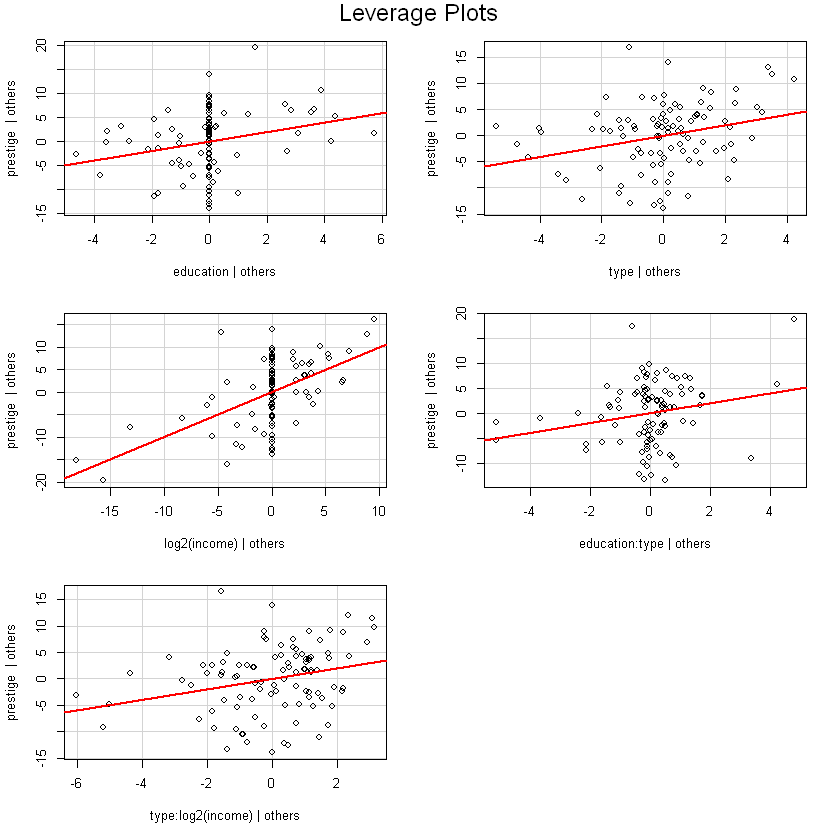

In [322]:
leveragePlots(prestige.mod.4a)
#it looks like every term is contributing to the model at least somewhat
# (ie none are a horizontal line)
# none are colinear with prestige, based on this plot (ie none are a 
#vertical line)

,Test stat,Pr(>|t|)
education,1.586,0.116
type,NA,NA
log2(income),1.872,0.065
Tukey test,2.157,0.031


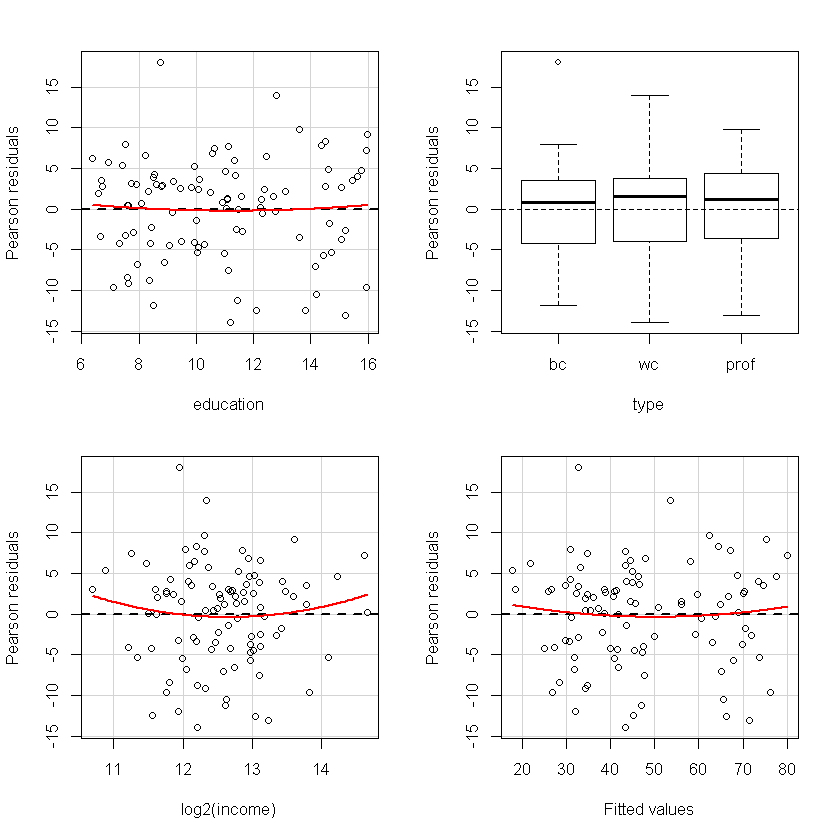

In [323]:
residualPlots(prestige.mod.4a)
#what I'd like things to look like here is a bunch of points randomly scattered
#around a horizontal best fit line, with about equal distance from the 
#horizontal line vertically all along the plot

#That is mostly the case here, with some minor exceptions 

#education looks the best -- basicly random residuals best fit by a basically horizontal line
# log2(income) still has something of a curved fit line, implying there
#might still be a better way to model this term
#Overall, however, looking at the fitted values it appears that our model
#is doing an all right job fitting the data and most assumptions aren't violated, except slightly at the tails of the data